# <font color = Green> *Lead Scoring Case Study*

-------

### <font color = Dark> *Objective*

    - An education company named X Education sells online courses to industry professionals. On any given day, many professionals interested in the courses land on their website, and other avenues, etc. and browse for courses. Once they fill up a form with their phone number and email id, a lead is generated. Currently, the lead conversion rate is about 30%. Our task is improve this using data.

    - The objective is to build a logistic regression model to assign scores between 0 to 100 to the leads procured, so that the marketing team can focus on the hotter leads, increasing their conversion rate and overall profits.

    - The model also needs to adjust to the company's requirements if they were to change in the future.

-------

### <font color = Dark> *Data*

    - Leads dataset from the past with around 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. 

---------

### <font color = Dark> *1. Data Cleaning*

In [4664]:
# importing all the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import xticks, yticks
import seaborn as sns
%matplotlib inline

import sklearn
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve

import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


# suppress warnings
import warnings
warnings.filterwarnings("ignore")


#Display options
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
%matplotlib inline

In [4665]:
# Loading the data

leads_master = pd.read_csv("Leads.csv")
leads_master.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4666]:
leads_master.shape

(9240, 37)

In [4667]:
# dropping duplicates

leads_master = leads_master.drop_duplicates()
leads_master.shape

(9240, 37)

In [4668]:
# no duplicate rows in the data

In [4669]:
# As we see there are some select values in some categorical variables where leads have not entered the info
# replacing select with Nan as they're as good as missing values

In [4670]:
leads_master = leads_master.replace('Select', np.nan)

In [4671]:
leads_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [4672]:
# Checking for missing values as we can see there are quite a few columns with NaN values

missing_percentage = round((100*(leads_master.isnull().sum()/leads_master.shape[0]).sort_values(ascending = False)),2)
missing_percentage

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

In [4673]:
# There are 10 columns with more than 35% missing data. 
# Tags is not user-generated.
# This won't represent the data for our model overall
# Most of these columns are trying to assign a score/quality to the data which is our objective
# Keeping city and Specialisation for further analysis and dropping the rest beyond 35%.

In [4674]:
# Creating a copy of the master
leads_copy = leads_master.copy()

#columns to drop
cols_to_drop = missing_percentage[missing_percentage > 40].index

#dropping the columns
leads_copy.drop(columns = cols_to_drop, inplace = True)
leads_copy.drop(columns = 'Tags', inplace = True)

In [4675]:
leads_copy.shape

(9240, 29)

In [4676]:
# Dealing with missing values of the remaing columns

In [4677]:
def cat_missing_values_information(df): # for categorical variables
    count = df.isnull().sum()
    decr = df.describe()
    val_counts = (df.value_counts(normalize = True) * 100).round(2)
    print("Count of Missing Values:\n", count)
    print("Percentage of Missing Values:\n", (count/df.shape[0] * 100).round(2))
    print("\nColumn Description:\n", decr)
    print("\nColumn Value Counts:\n", val_counts)

def num_missing_values_information(df): # for numberical variables
    count = df.isnull().sum()
    decr = df.describe()
    print("Count of Missing Values:\n", count)
    print("Percentage of Missing Values:\n", (count/df.shape[0] * 100).round(2))
    print("\nColumn Description:\n", decr)

In [4678]:
cols_to_treat = missing_percentage[(missing_percentage < 40) & (missing_percentage > 0)].index
cols_to_treat

Index(['City', 'Specialization', 'Tags',
       'What matters most to you in choosing a course',
       'What is your current occupation', 'Country', 'Page Views Per Visit',
       'TotalVisits', 'Last Activity', 'Lead Source'],
      dtype='object')

In [4679]:
# 'What matters most to you in choosing a course column'
cat_missing_values_information(leads_copy["What matters most to you in choosing a course"])

Count of Missing Values:
 2709
Percentage of Missing Values:
 29.32

Column Description:
 count                        6531
unique                          3
top       Better Career Prospects
freq                         6528
Name: What matters most to you in choosing a course, dtype: object

Column Value Counts:
 What matters most to you in choosing a course
Better Career Prospects      99.95
Flexibility & Convenience     0.03
Other                         0.02
Name: proportion, dtype: float64


In [4680]:
# This is a column where the options are selected by the customer. 
# We can replace the missing values with "Better Career Prospects" as this is the most frequently chosen option (99%)

In [4681]:
leads_copy["What matters most to you in choosing a course"] = leads_copy["What matters most to you in choosing a course"].fillna("Better Career Prospects")

In [4682]:
# 'What is your current occupation' column
cat_missing_values_information(leads_copy["What is your current occupation"])

Count of Missing Values:
 2690
Percentage of Missing Values:
 29.11

Column Description:
 count           6550
unique             6
top       Unemployed
freq            5600
Name: What is your current occupation, dtype: object

Column Value Counts:
 What is your current occupation
Unemployed              85.50
Working Professional    10.78
Student                  3.21
Other                    0.24
Housewife                0.15
Businessman              0.12
Name: proportion, dtype: float64


In [4683]:
# We can replace the missing values with the mode of this column "Unemployed". 

In [4684]:
leads_copy["What is your current occupation"] = leads_copy["What is your current occupation"].fillna("Unemployed")

In [4685]:
# Country column
cat_missing_values_information(leads_copy['Country'])

Count of Missing Values:
 2461
Percentage of Missing Values:
 26.63

Column Description:
 count      6779
unique       38
top       India
freq       6492
Name: Country, dtype: object

Column Value Counts:
 Country
India                   95.77
United States            1.02
United Arab Emirates     0.78
Singapore                0.35
Saudi Arabia             0.31
United Kingdom           0.22
Australia                0.19
Qatar                    0.15
Hong Kong                0.10
Bahrain                  0.10
Oman                     0.09
France                   0.09
unknown                  0.07
South Africa             0.06
Nigeria                  0.06
Germany                  0.06
Kuwait                   0.06
Canada                   0.06
Sweden                   0.04
China                    0.03
Asia/Pacific Region      0.03
Uganda                   0.03
Bangladesh               0.03
Italy                    0.03
Belgium                  0.03
Netherlands              0.03
Ghana 

In [4686]:
# Imputing the missing values with the mode of this column "India"

In [4687]:
# Filling missing with India and replacing all the other countries with others as they have less representation
leads_copy["Country"] = leads_copy["Country"].fillna("India")
leads_copy["Country"] = leads_copy["Country"].apply(lambda x: x if x == "India" else "Others")

In [4688]:
leads_copy["Country"].value_counts(normalize = True)*100

Country
India     96.893939
Others     3.106061
Name: proportion, dtype: float64

In [4689]:
# 'Specialization'
cat_missing_values_information(leads_copy['Specialization'])

Count of Missing Values:
 3380
Percentage of Missing Values:
 36.58

Column Description:
 count                   5860
unique                    18
top       Finance Management
freq                     976
Name: Specialization, dtype: object

Column Value Counts:
 Specialization
Finance Management                   16.66
Human Resource Management            14.47
Marketing Management                 14.30
Operations Management                 8.58
Business Administration               6.88
IT Projects Management                6.25
Supply Chain Management               5.96
Banking, Investment And Insurance     5.77
Travel and Tourism                    3.46
Media and Advertising                 3.46
International Business                3.04
Healthcare Management                 2.71
Hospitality Management                1.95
E-COMMERCE                            1.91
Retail Management                     1.71
Rural and Agribusiness                1.25
E-Business                      

In [4690]:
# Imputing the null values in this column with 'Not Specified' as there is no clear majority in the specialisations 
# We cannot drop this column since it is user-entered data.
# Merging some of the management-related specialisations into 'Management'
# Changing some names for easy readability on graphs.

In [4691]:
leads_copy["Specialization"] = leads_copy["Specialization"].fillna("Other Specialization")

leads_copy["Specialization"] = leads_copy["Specialization"].replace(["IT Projects Management", 
                                                                     "Supply Chain Management", 
                                                                     "Healthcare Management", 
                                                                     "Hospitality Management", 
                                                                     "Retail Management"], "Other Management")

leads_copy["Specialization"] = leads_copy["Specialization"].replace({'Finance Management':'Finance',
                                                                     'Marketing Management':'Marketing',
                                                                     'Operations Management': 'Operations',
                                                                     'Human Resource Management': 'Human Resource',
                                                                    'E-COMMERCE': 'E-Business'})

In [4692]:
# City column
cat_missing_values_information(leads_copy.City)

Count of Missing Values:
 3669
Percentage of Missing Values:
 39.71

Column Description:
 count       5571
unique         6
top       Mumbai
freq        3222
Name: City, dtype: object

Column Value Counts:
 City
Mumbai                         57.84
Thane & Outskirts              13.50
Other Cities                   12.31
Other Cities of Maharashtra     8.20
Other Metro Cities              6.82
Tier II Cities                  1.33
Name: proportion, dtype: float64


In [4693]:
# Imputing the null values with the mode of this column "Mumbai".

In [4694]:
leads_copy.City = leads_copy.City.fillna("Mumbai")

In [4695]:
# 'Lead Source' column
cat_missing_values_information(leads_copy['Lead Source'])

Count of Missing Values:
 36
Percentage of Missing Values:
 0.39

Column Description:
 count       9204
unique        21
top       Google
freq        2868
Name: Lead Source, dtype: object

Column Value Counts:
 Lead Source
Google               31.16
Direct Traffic       27.63
Olark Chat           19.07
Organic Search       12.54
Reference             5.80
Welingak Website      1.54
Referral Sites        1.36
Facebook              0.60
bing                  0.07
google                0.05
Click2call            0.04
Press_Release         0.02
Social Media          0.02
Live Chat             0.02
youtubechannel        0.01
testone               0.01
Pay per Click Ads     0.01
welearnblog_Home      0.01
WeLearn               0.01
blog                  0.01
NC_EDM                0.01
Name: proportion, dtype: float64


In [4696]:
# Imputing missing values with mode of this column "Google". 
# Also making some categorical changes to reduce layers while retaining the information. 

In [4697]:
leads_copy['Lead Source'] = leads_copy['Lead Source'].fillna("Google")
leads_copy['Lead Source'] = leads_copy['Lead Source'].replace("google", "Google")

In [4698]:
def lead_source_cat_reduction(values):
    if values in ['Google', 'Direct Traffic', 'Olark Chat', 'Organic Search', 'Reference', 'Welingak Website', 'Referral Sites']:
        return values
    else:
        return 'Others'

leads_copy['Lead Source'] = leads_copy['Lead Source'].apply(lead_source_cat_reduction)

In [4699]:
leads_copy['Lead Source'].value_counts(normalize = True)*100

Lead Source
Google              31.482684
Direct Traffic      27.521645
Olark Chat          18.993506
Organic Search      12.489177
Reference            5.779221
Welingak Website     1.536797
Referral Sites       1.352814
Others               0.844156
Name: proportion, dtype: float64

In [4700]:
# 'Last Activity' column
cat_missing_values_information(leads_copy['Last Activity'])

Count of Missing Values:
 103
Percentage of Missing Values:
 1.11

Column Description:
 count             9137
unique              17
top       Email Opened
freq              3437
Name: Last Activity, dtype: object

Column Value Counts:
 Last Activity
Email Opened                    37.62
SMS Sent                        30.04
Olark Chat Conversation         10.65
Page Visited on Website          7.00
Converted to Lead                4.68
Email Bounced                    3.57
Email Link Clicked               2.92
Form Submitted on Website        1.27
Unreachable                      1.02
Unsubscribed                     0.67
Had a Phone Conversation         0.33
Approached upfront               0.10
View in browser link Clicked     0.07
Email Received                   0.02
Email Marked Spam                0.02
Visited Booth in Tradeshow       0.01
Resubscribed to emails           0.01
Name: proportion, dtype: float64


In [4701]:
# Imputing Email opened as missing values of this column as that's the most frequent last action

In [4702]:
leads_copy['Last Activity'] = leads_copy['Last Activity'].fillna('Email Opened')

In [4703]:
# Numerical missing value columns
num_missing_values_information(leads_copy[['Page Views Per Visit', 'TotalVisits']])

Count of Missing Values:
 Page Views Per Visit    137
TotalVisits             137
dtype: int64
Percentage of Missing Values:
 Page Views Per Visit    1.48
TotalVisits             1.48
dtype: float64

Column Description:
        Page Views Per Visit  TotalVisits
count           9103.000000  9103.000000
mean               2.362820     3.445238
std                2.161418     4.854853
min                0.000000     0.000000
25%                1.000000     1.000000
50%                2.000000     3.000000
75%                3.000000     5.000000
max               55.000000   251.000000


In [4704]:
# AS this is an important column and only 1.48% is missing, we can avoid introduing bias and omit the rows with Missing values.

In [4705]:
leads_copy.dropna(inplace = True)

In [4706]:
leads_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9103 entries, 0 to 9239
Data columns (total 29 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9103 non-null   object 
 1   Lead Number                                    9103 non-null   int64  
 2   Lead Origin                                    9103 non-null   object 
 3   Lead Source                                    9103 non-null   object 
 4   Do Not Email                                   9103 non-null   object 
 5   Do Not Call                                    9103 non-null   object 
 6   Converted                                      9103 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9103 non-null   int64  
 9   Page Views Per Visit                           9103 non-n

In [4707]:
# ALl the missing values have been treated

In [4708]:
# Changing some column names so that dummy variables are easier to read and use

leads_copy = leads_copy.rename(columns = {'Prospect ID': 'Prospect_ID',	'Lead Number':'Lead_Number',
                                          'Lead Origin': 'Lead_Origin', 'Lead Source': 'Lead_Source', 
                                                'Do Not Email': 'Do_Not_Email', 'Do Not Call':'Do_Not_Call',
                                                'Total Time Spent on Website': 'Website_time',
                                                'Page Views Per Visit':'Views_Per_Visit', 
                                                'What is your current occupation': 'Current_Occupation',
                                                'What matters most to you in choosing a course': 'Course_Purpose',
                                                'Newspaper Article':'Newspaper_Article', 
                                                'X Education Forums': 'X_Education_Forums', 
                                                'Digital Advertisement': 'Digital_Ads', 
                                                'Through Recommendations':'Recommendations',
                                                'Receive More Updates About Our Courses': 'Receive_Course_Updates',
                                                'Update me on Supply Chain Content': 'Supply_Chain_Updates', 
                                                'Get updates on DM Content': 'DM_Content_Updates',
                                                'I agree to pay the amount through cheque': 'Cheque_Payment',
                                                'A free copy of Mastering The Interview': 'Free_E_Book_Chosen',
                                          'Last Activity': 'Last_Activity',
                                          'Last Notable Activity':'Last_Notable_Activity'})

In [4709]:
# Converting 'Converted' to Yes's and No's for easy interpretability in EDA. Will change it back later

In [4710]:
leads_copy['Converted'] = leads_copy['Converted'].apply(lambda x: 'Yes' if x == 1 else 'No')

In [4711]:
leads_copy.head()

,Prospect_ID,Lead_Number,Lead_Origin,Lead_Source,Do_Not_Email,Do_Not_Call,Converted,TotalVisits,Website_time,Views_Per_Visit,Last_Activity,Country,Specialization,Current_Occupation,Course_Purpose,Search,Magazine,Newspaper_Article,X_Education_Forums,Newspaper,Digital_Ads,Recommendations,Receive_Course_Updates,Supply_Chain_Updates,DM_Content_Updates,City,Cheque_Payment,Free_E_Book_Chosen,Last_Notable_Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,No,0.0,0,0.0,Page Visited on Website,India,Other Specialization,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,No,5.0,674,2.5,Email Opened,India,Other Specialization,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,Yes,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,No,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,Yes,2.0,1428,1.0,Converted to Lead,India,Other Specialization,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No,Modified


---------

### <font color = Dark> *2. Exploratory Data Analysis*

#### Outliers and Numerical Variable Analysis

In [4715]:
# Checking for outliers in numerical columns
leads_copy.describe(percentiles = [0.25, 0.50, 0.75, 0.90, .95, .99, 0.999])

,Lead_Number,TotalVisits,Website_time,Views_Per_Visit
count,9103.000000,9103.000000,9103.000000,9103.000000
mean,617027.742612,3.445238,481.350104,2.362820
std,23337.138926,4.854853,545.066142,2.161418
min,579533.000000,0.000000,0.000000,0.000000
25%,596408.000000,1.000000,9.000000,1.000000
50%,615278.000000,3.000000,244.000000,2.000000
75%,637166.000000,5.000000,919.500000,3.000000
90%,650254.000000,7.000000,1372.000000,5.000000
95%,655337.900000,10.000000,1556.900000,6.000000
99%,659561.860000,17.000000,1838.960000,9.000000


In [4716]:
# There seem to be Outliers in the data especially with TotalVisits and Views_Per_Visit

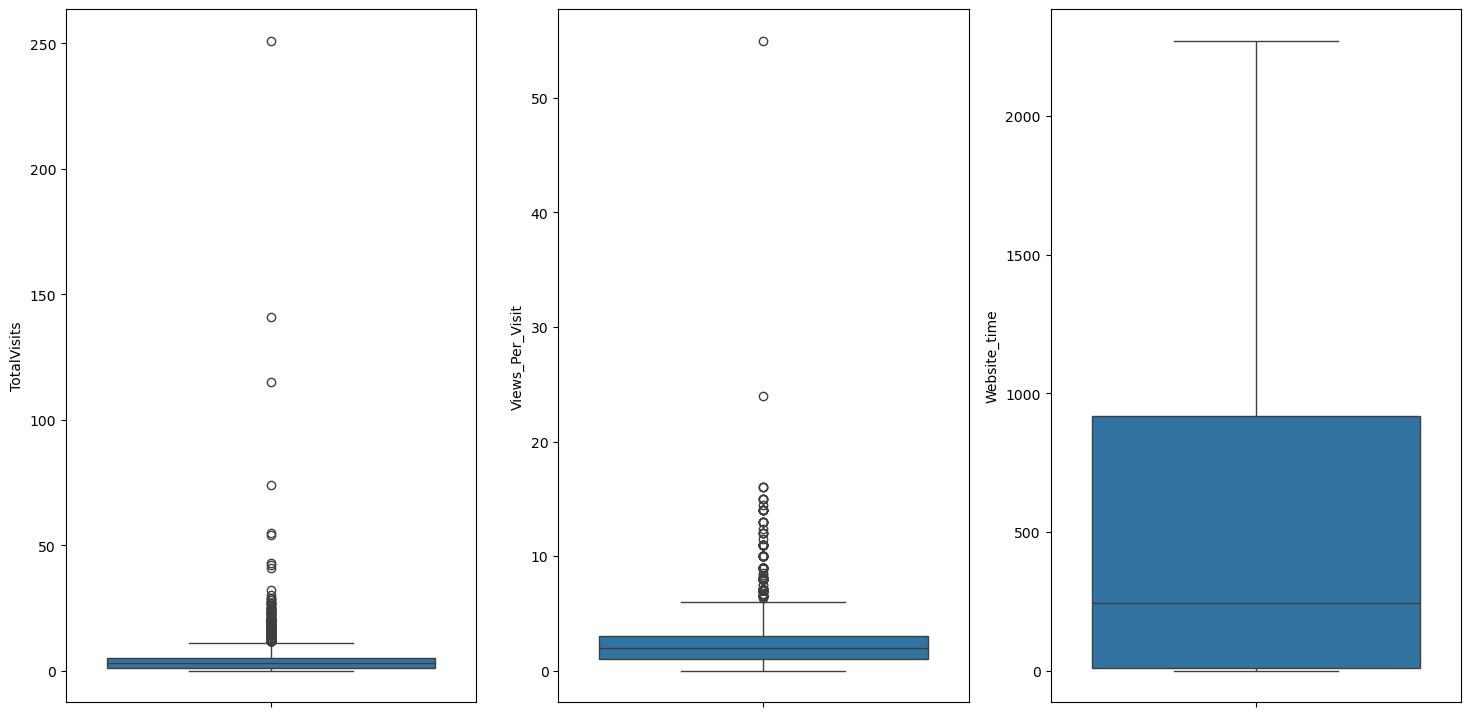

In [4717]:
plt.figure(figsize = (18,9))

plt.subplot(1,3,1)
sns.boxplot(leads_copy['TotalVisits'])

plt.subplot(1,3,2)
sns.boxplot(leads_copy['Views_Per_Visit'])

plt.subplot(1,3,3)
sns.boxplot(leads_copy['Website_time'])


plt.show()

In [4718]:
# Comparing leads above 99th Percentile in Total Visits
leads_copy[['Converted', 'TotalVisits',	'Website_time',	'Views_Per_Visit']][leads_copy["TotalVisits"] > 18]

,Converted,TotalVisits,Website_time,Views_Per_Visit
345,Yes,21.0,1113,2.63
469,No,22.0,59,5.50
663,Yes,21.0,1885,3.50
767,No,19.0,415,4.75
1115,No,20.0,808,2.86
1160,No,43.0,57,3.91
1459,No,20.0,1165,2.50
1741,No,22.0,601,1.38
1824,No,30.0,68,10.00
2154,Yes,23.0,1677,2.09


In [4719]:
# Comparing leads above 99.9th Percentile in Total Visits
leads_copy[['Converted', 'TotalVisits',	'Website_time',	'Views_Per_Visit']][leads_copy["TotalVisits"] > 32]

,Converted,TotalVisits,Website_time,Views_Per_Visit
1160,No,43.0,57,3.91
2190,No,55.0,297,55.00
2322,No,141.0,755,6.71
5283,No,74.0,1209,12.33
5530,No,41.0,311,1.14
5538,No,54.0,1280,4.50
5608,No,115.0,187,8.21
6102,Yes,251.0,49,1.48
8230,No,42.0,1148,3.82


In [4720]:
# There are some entries with high website time but normal page visits.
# This can be website issues like page loading time, idle screens from users, indecisiveness, etc.
# However, beyond the 99th percentile, the numbers seem like spam leads bot actions or unusual/rare occurrences 
# So capping the data below 99th percentile i.e <=17 page visits.

In [4721]:
leads_copy = leads_copy[leads_copy['TotalVisits'] <= 17]

In [4722]:
leads_copy.shape

(9020, 29)

#### *Univariate analysis for categorical Variables*

In [4724]:
# The target variable and cheking for data imbalance

In [4725]:
leads_copy["Converted"].value_counts(normalize = True)*100

Converted
No     62.028825
Yes    37.971175
Name: proportion, dtype: float64

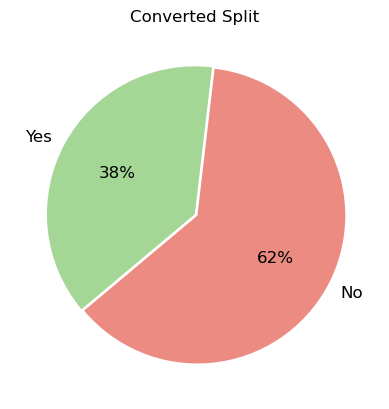

In [4726]:
plt.pie(leads_copy["Converted"].value_counts(normalize = True), explode=(0.02,0.0), labels = ['No', 'Yes'], autopct='%1.0f%%',
        colors = ['#ec8b82', '#a4d696'],
        textprops={"fontsize": 12, "fontweight" : 15, "color" : "black"}, 
        startangle=220)
plt.title("Converted Split", fontdict = {'fontsize': 12, 'fontweight' : 15, 'color' : 'Black'})

plt.show()

In [4727]:
# There is certain imbalance in the data but it's faily balanced for out model building

#### *Exploring other columns*

In [4729]:
leads_copy.columns

Index(['Prospect_ID', 'Lead_Number', 'Lead_Origin', 'Lead_Source',
       'Do_Not_Email', 'Do_Not_Call', 'Converted', 'TotalVisits',
       'Website_time', 'Views_Per_Visit', 'Last_Activity', 'Country',
       'Specialization', 'Current_Occupation', 'Course_Purpose', 'Search',
       'Magazine', 'Newspaper_Article', 'X_Education_Forums', 'Newspaper',
       'Digital_Ads', 'Recommendations', 'Receive_Course_Updates',
       'Supply_Chain_Updates', 'DM_Content_Updates', 'City', 'Cheque_Payment',
       'Free_E_Book_Chosen', 'Last_Notable_Activity'],
      dtype='object')

#### *Lead_Origin*

In [4731]:
leads_copy['Lead_Origin'].value_counts(normalize = True)*100

Lead_Origin
Landing Page Submission    53.436807
API                        39.490022
Lead Add Form               6.729490
Lead Import                 0.343681
Name: proportion, dtype: float64

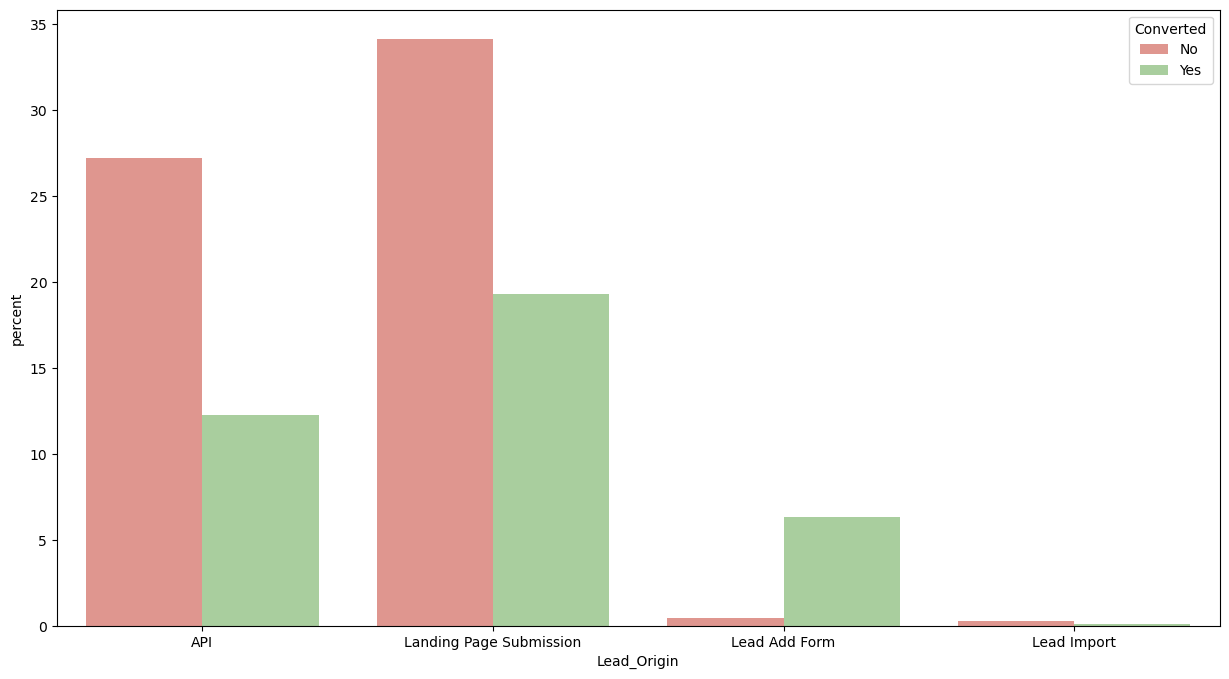

In [4732]:
fig, axs = plt.subplots(figsize = (15,8))
sns.countplot(x = 'Lead_Origin', hue = 'Converted', data = leads_copy, palette = ['#ec8b82', '#a4d696'],stat = 'percent')
plt.show()

In [4733]:
# Lead Add form has a very good conversion rate
# we can focus on improving the conversions via landing page submissions and API as most of our leads are coming from these origins

#### *Lead_Source*

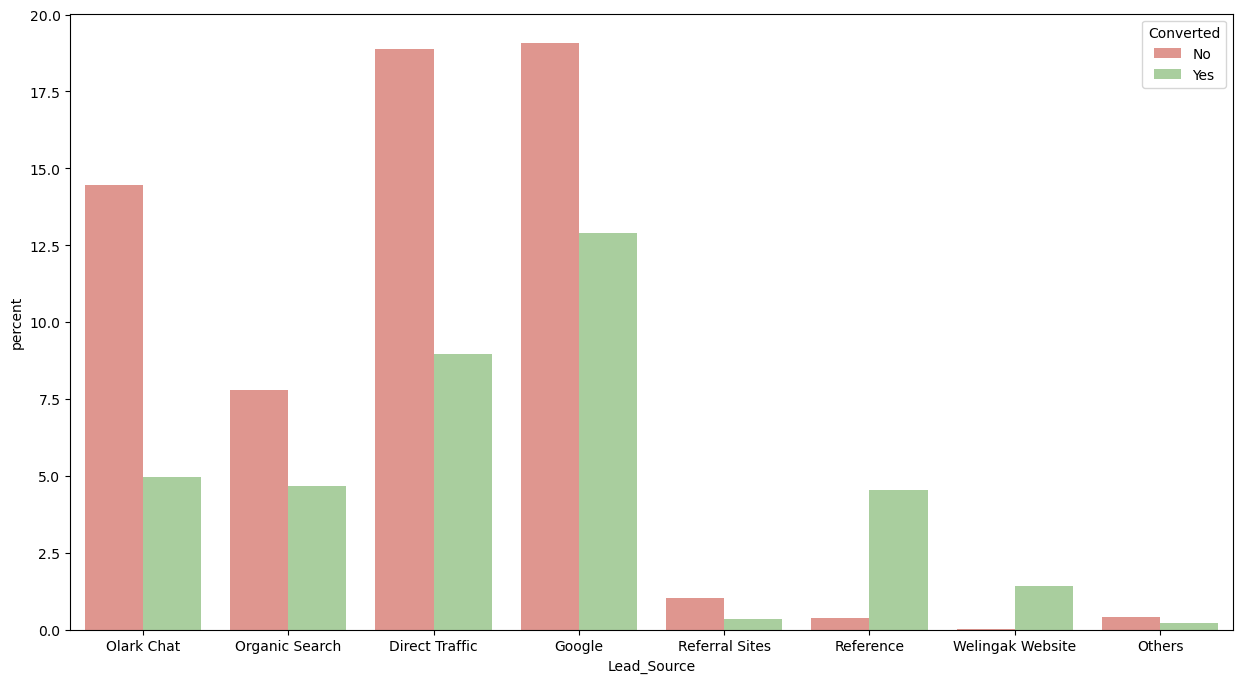

In [4735]:
fig, axs = plt.subplots(figsize = (15,8))
sns.countplot(x = 'Lead_Source', hue = 'Converted', data = leads_copy, palette = ['#ec8b82', '#a4d696'],stat = 'percent')
plt.show()

In [4736]:
# Referrals and other sources seem to have a higher conversion rate than online sources
# The 4 major online sources have very bad conversion rates 
# This suggests the experience of the user on the website and chat is not good enough for strong conversion

#### *Country*

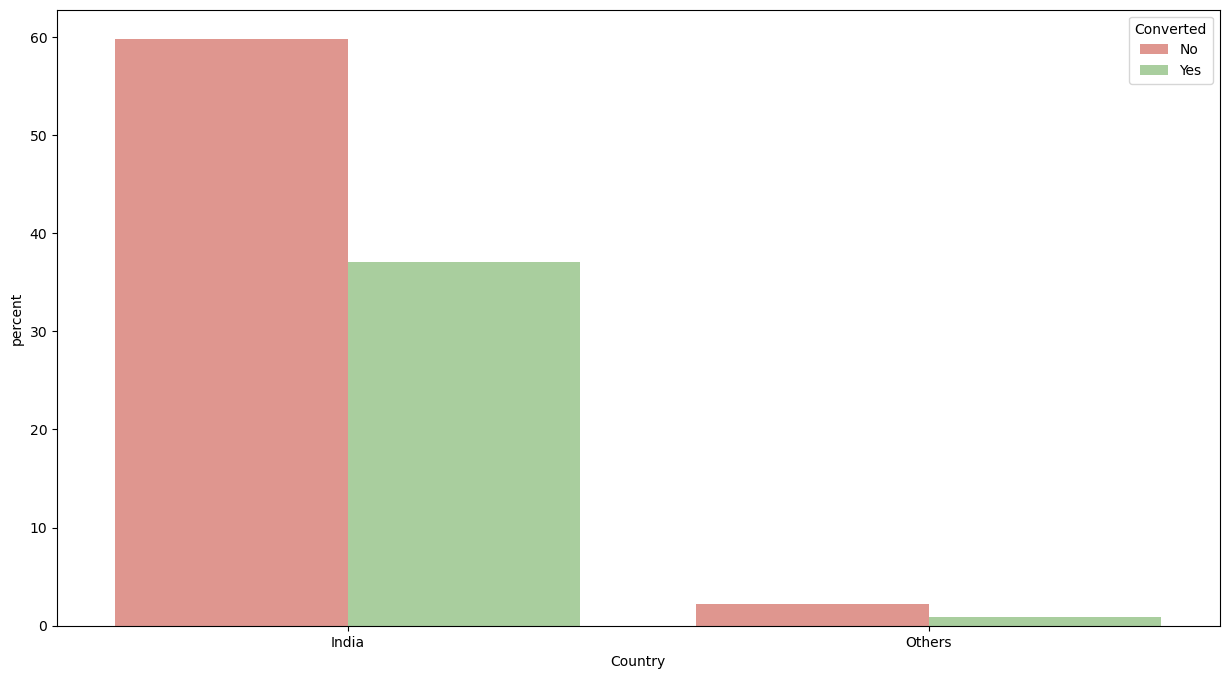

In [4738]:
fig, axs = plt.subplots(figsize = (15,8))
sns.countplot(x = 'Country', hue = 'Converted', data = leads_copy, palette = ['#ec8b82', '#a4d696'],stat = 'percent')
plt.show()

In [4739]:
# There is no change in the behaviour of conversions between India and Other countries
# Since 95% of the data is from India this does not add any predictive power either
# Dropping this column

In [4740]:
leads_copy.drop(['Country'], axis = 1, inplace = True)

#### *Specialization*

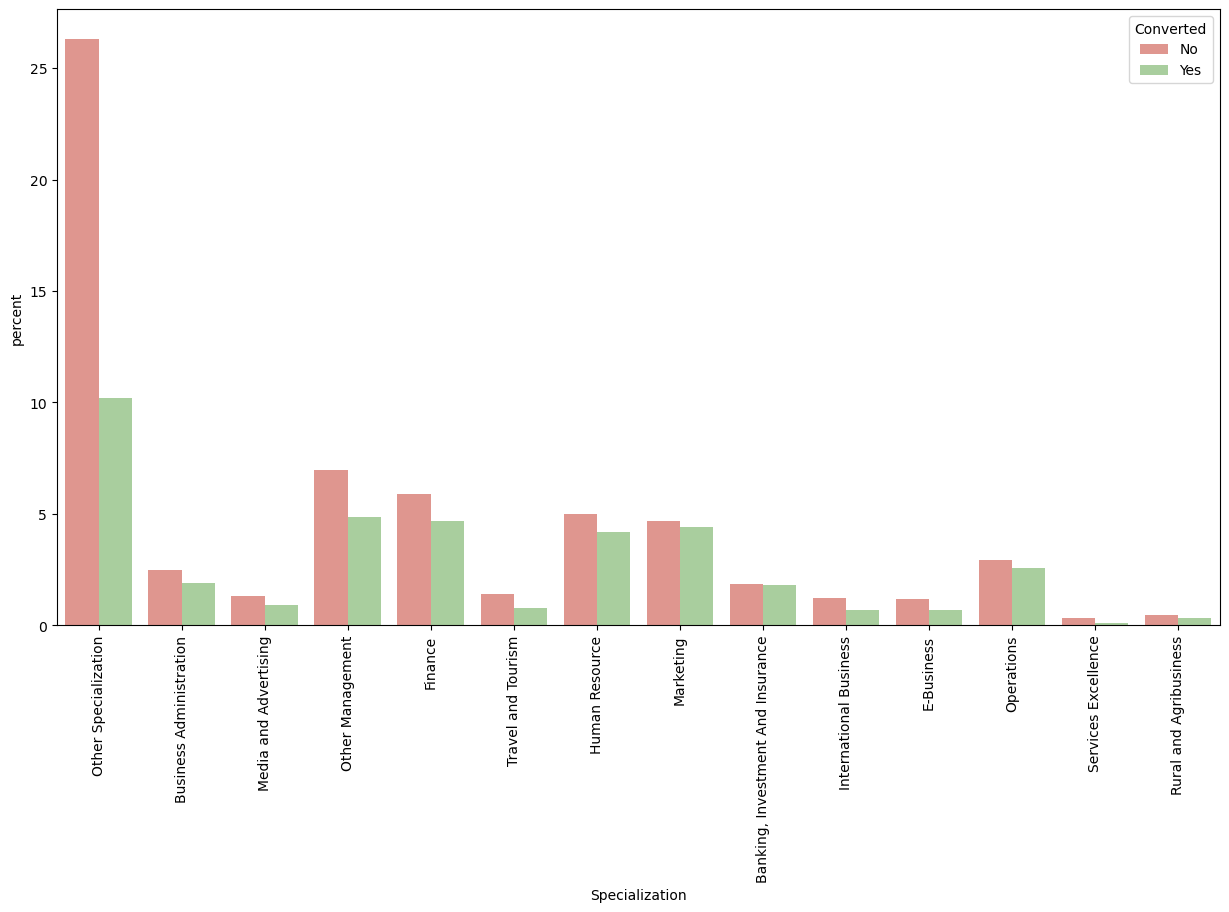

In [4742]:
fig, axs = plt.subplots(figsize = (15,8))
sns.countplot(x = 'Specialization', hue = 'Converted', data = leads_copy, palette = ['#ec8b82', '#a4d696'],stat = 'percent')
xticks(rotation = 90)
plt.show()

In [4743]:
# Category 'Others' which was imputed seem to have very stark differences in conversion rate
# This suggests these users are either students in undergrad or below (non-specialisation), belong to Tech,
# Or do not have formal education, or Houseviwes, etc.

#### *Current_Occupation, Course_Purpose*

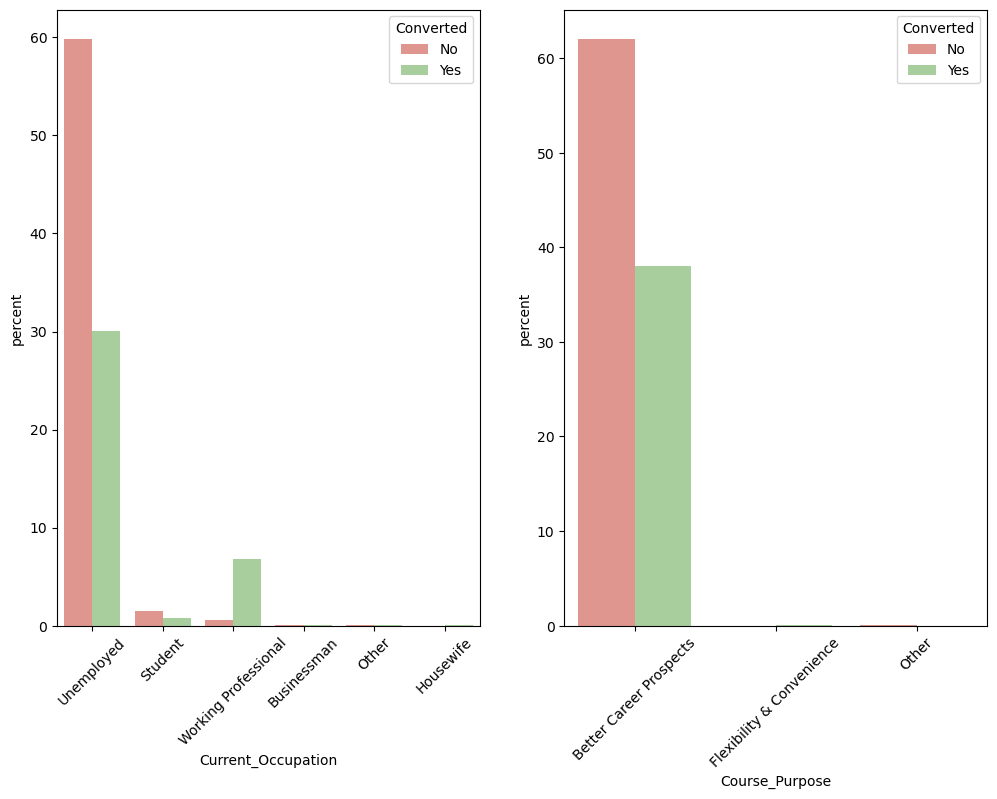

In [4745]:
fig, axs = plt.subplots(1,2, figsize = (12,8))

#1
sns.countplot(x = 'Current_Occupation', hue = 'Converted', data = leads_copy, palette = ['#ec8b82', '#a4d696'], ax = axs[0],
              stat = 'percent')
axs[0].tick_params(axis='x', rotation=45)

#2
sns.countplot(x = 'Course_Purpose', hue = 'Converted', data = leads_copy, palette = ['#ec8b82', '#a4d696'],ax = axs[1],
              stat = 'percent')
axs[1].tick_params(axis='x', rotation=45)

plt.show()

In [4746]:
# Better career prospects 99% of the data, so dropping the Course_Purpose column
# Working professionals have a high conversion rate.
# However large part of our leads are unemployed, despite missing value imputation
# 60% of unemployed do not convert
# This suggests our courses may not be suited to getting employment opportunities but rather improving career with current employer
# "SKILL-UP" and no "SKILLING"

In [4747]:
leads_copy.drop(['Course_Purpose'], axis = 1, inplace = True)

#### *City*

In [4749]:
leads_copy.City.value_counts()

City
Mumbai                         6726
Thane & Outskirts               732
Other Cities                    671
Other Cities of Maharashtra     446
Other Metro Cities              372
Tier II Cities                   73
Name: count, dtype: int64

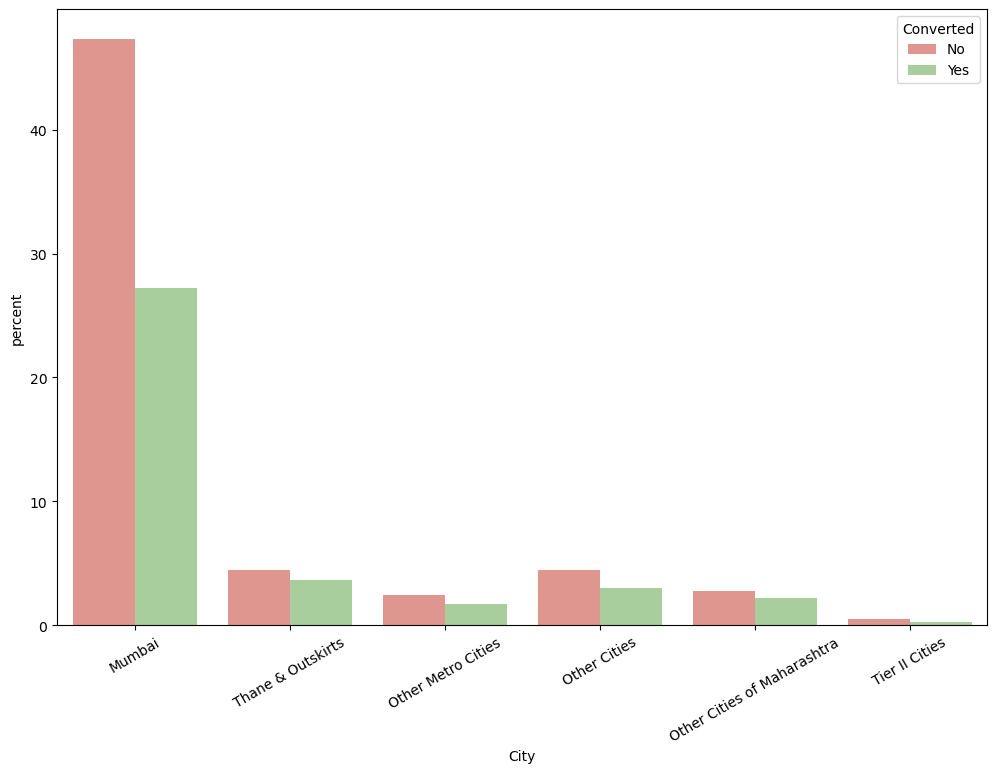

In [4750]:
fig, axs = plt.subplots(figsize = (12,8))
sns.countplot(x = 'City', hue = 'Converted', data = leads_copy, palette = ['#ec8b82', '#a4d696'],stat = 'percent')
xticks(rotation = 30)
plt.show()

In [4751]:
# Since there is no change in conversion behaviour between values other than Mumbai, we can merge them to reduce some layers
# Keeping, Mumbai, Thane and Outskirts, And grouping the rest to "Other Cities"

In [4752]:
replace_list = ['Other Metro Cities','Other Cities of Maharashtra', 'Tier II Cities']
leads_copy.City = leads_copy.City.replace(replace_list, 'Other Cities')

In [4753]:
leads_copy.City.value_counts(normalize = True)*100

City
Mumbai               74.567627
Other Cities         17.317073
Thane & Outskirts     8.115299
Name: proportion, dtype: float64

#### *Do_Not_Email, Do_Not_Call*

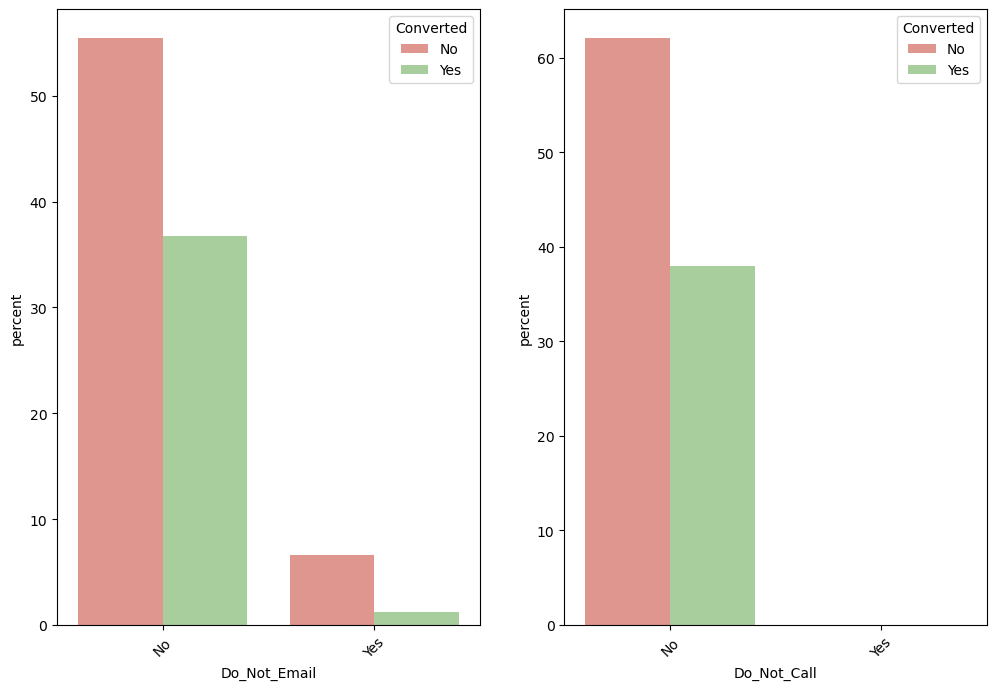

In [4755]:
fig, axs = plt.subplots(1,2, figsize = (12,8))

#1
sns.countplot(x = 'Do_Not_Email', hue = 'Converted', data = leads_copy, palette = ['#ec8b82', '#a4d696'], ax = axs[0],
              stat = 'percent')
axs[0].tick_params(axis='x', rotation=45)

#2
sns.countplot(x = 'Do_Not_Call', hue = 'Converted', data = leads_copy, palette = ['#ec8b82', '#a4d696'],ax = axs[1],
              stat = 'percent')
axs[1].tick_params(axis='x', rotation=45)

plt.show()

In [4756]:
leads_copy['Do_Not_Call'].value_counts()

Do_Not_Call
No     9018
Yes       2
Name: count, dtype: int64

In [4757]:
# So these columns won't add much predictive power as it's completely biased
# Dropping them

In [4758]:
leads_copy.drop(['Do_Not_Call', 'Do_Not_Email'], axis = 1, inplace = True)

#### *Last Activity and Last Notable Activity*

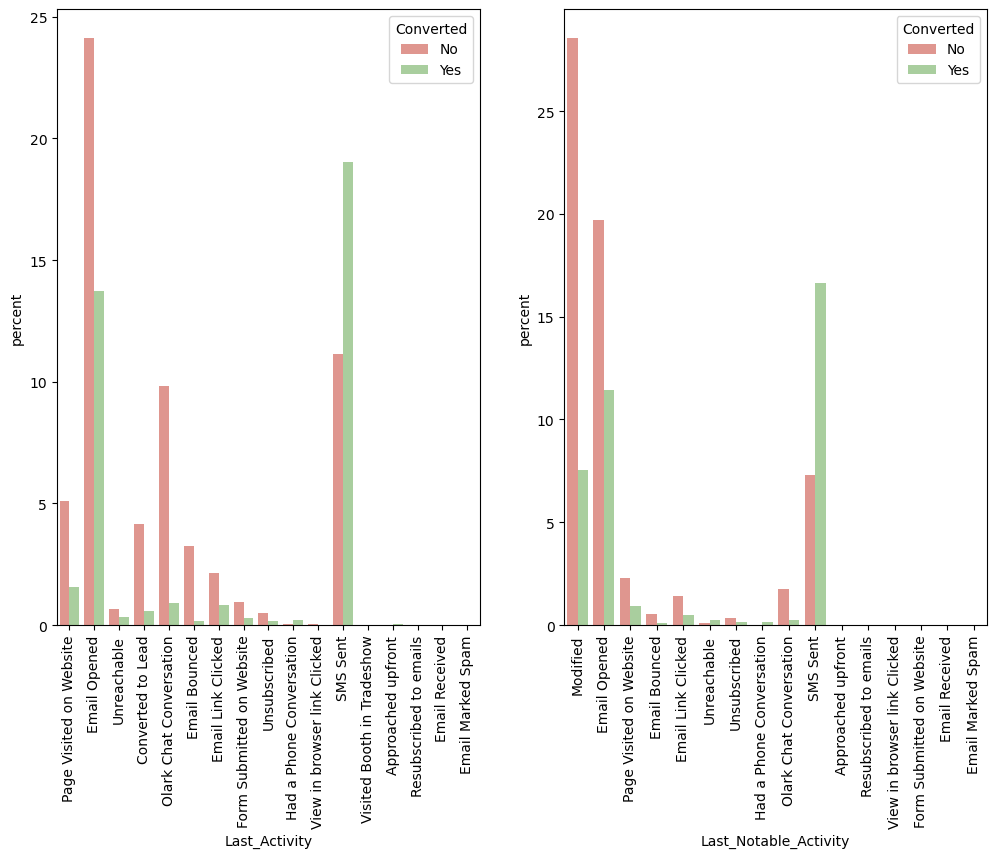

In [4760]:
fig, axs = plt.subplots(1,2, figsize = (12,8))

#1
sns.countplot(x = 'Last_Activity', hue = 'Converted', data = leads_copy, palette = ['#ec8b82', '#a4d696'], ax = axs[0],
              stat = 'percent')
axs[0].tick_params(axis='x', rotation=90)

#2
sns.countplot(x = 'Last_Notable_Activity', hue = 'Converted', data = leads_copy, palette = ['#ec8b82', '#a4d696'],ax = axs[1],
              stat = 'percent')
axs[1].tick_params(axis='x', rotation=90)

plt.show()

In [4761]:
# SMS sent has very high conversion rate
# Dropping these columns as it is not user generated data

leads_copy.drop(['Last_Activity','Last_Notable_Activity'], axis = 1, inplace = True)

#### *Rest of the columns*

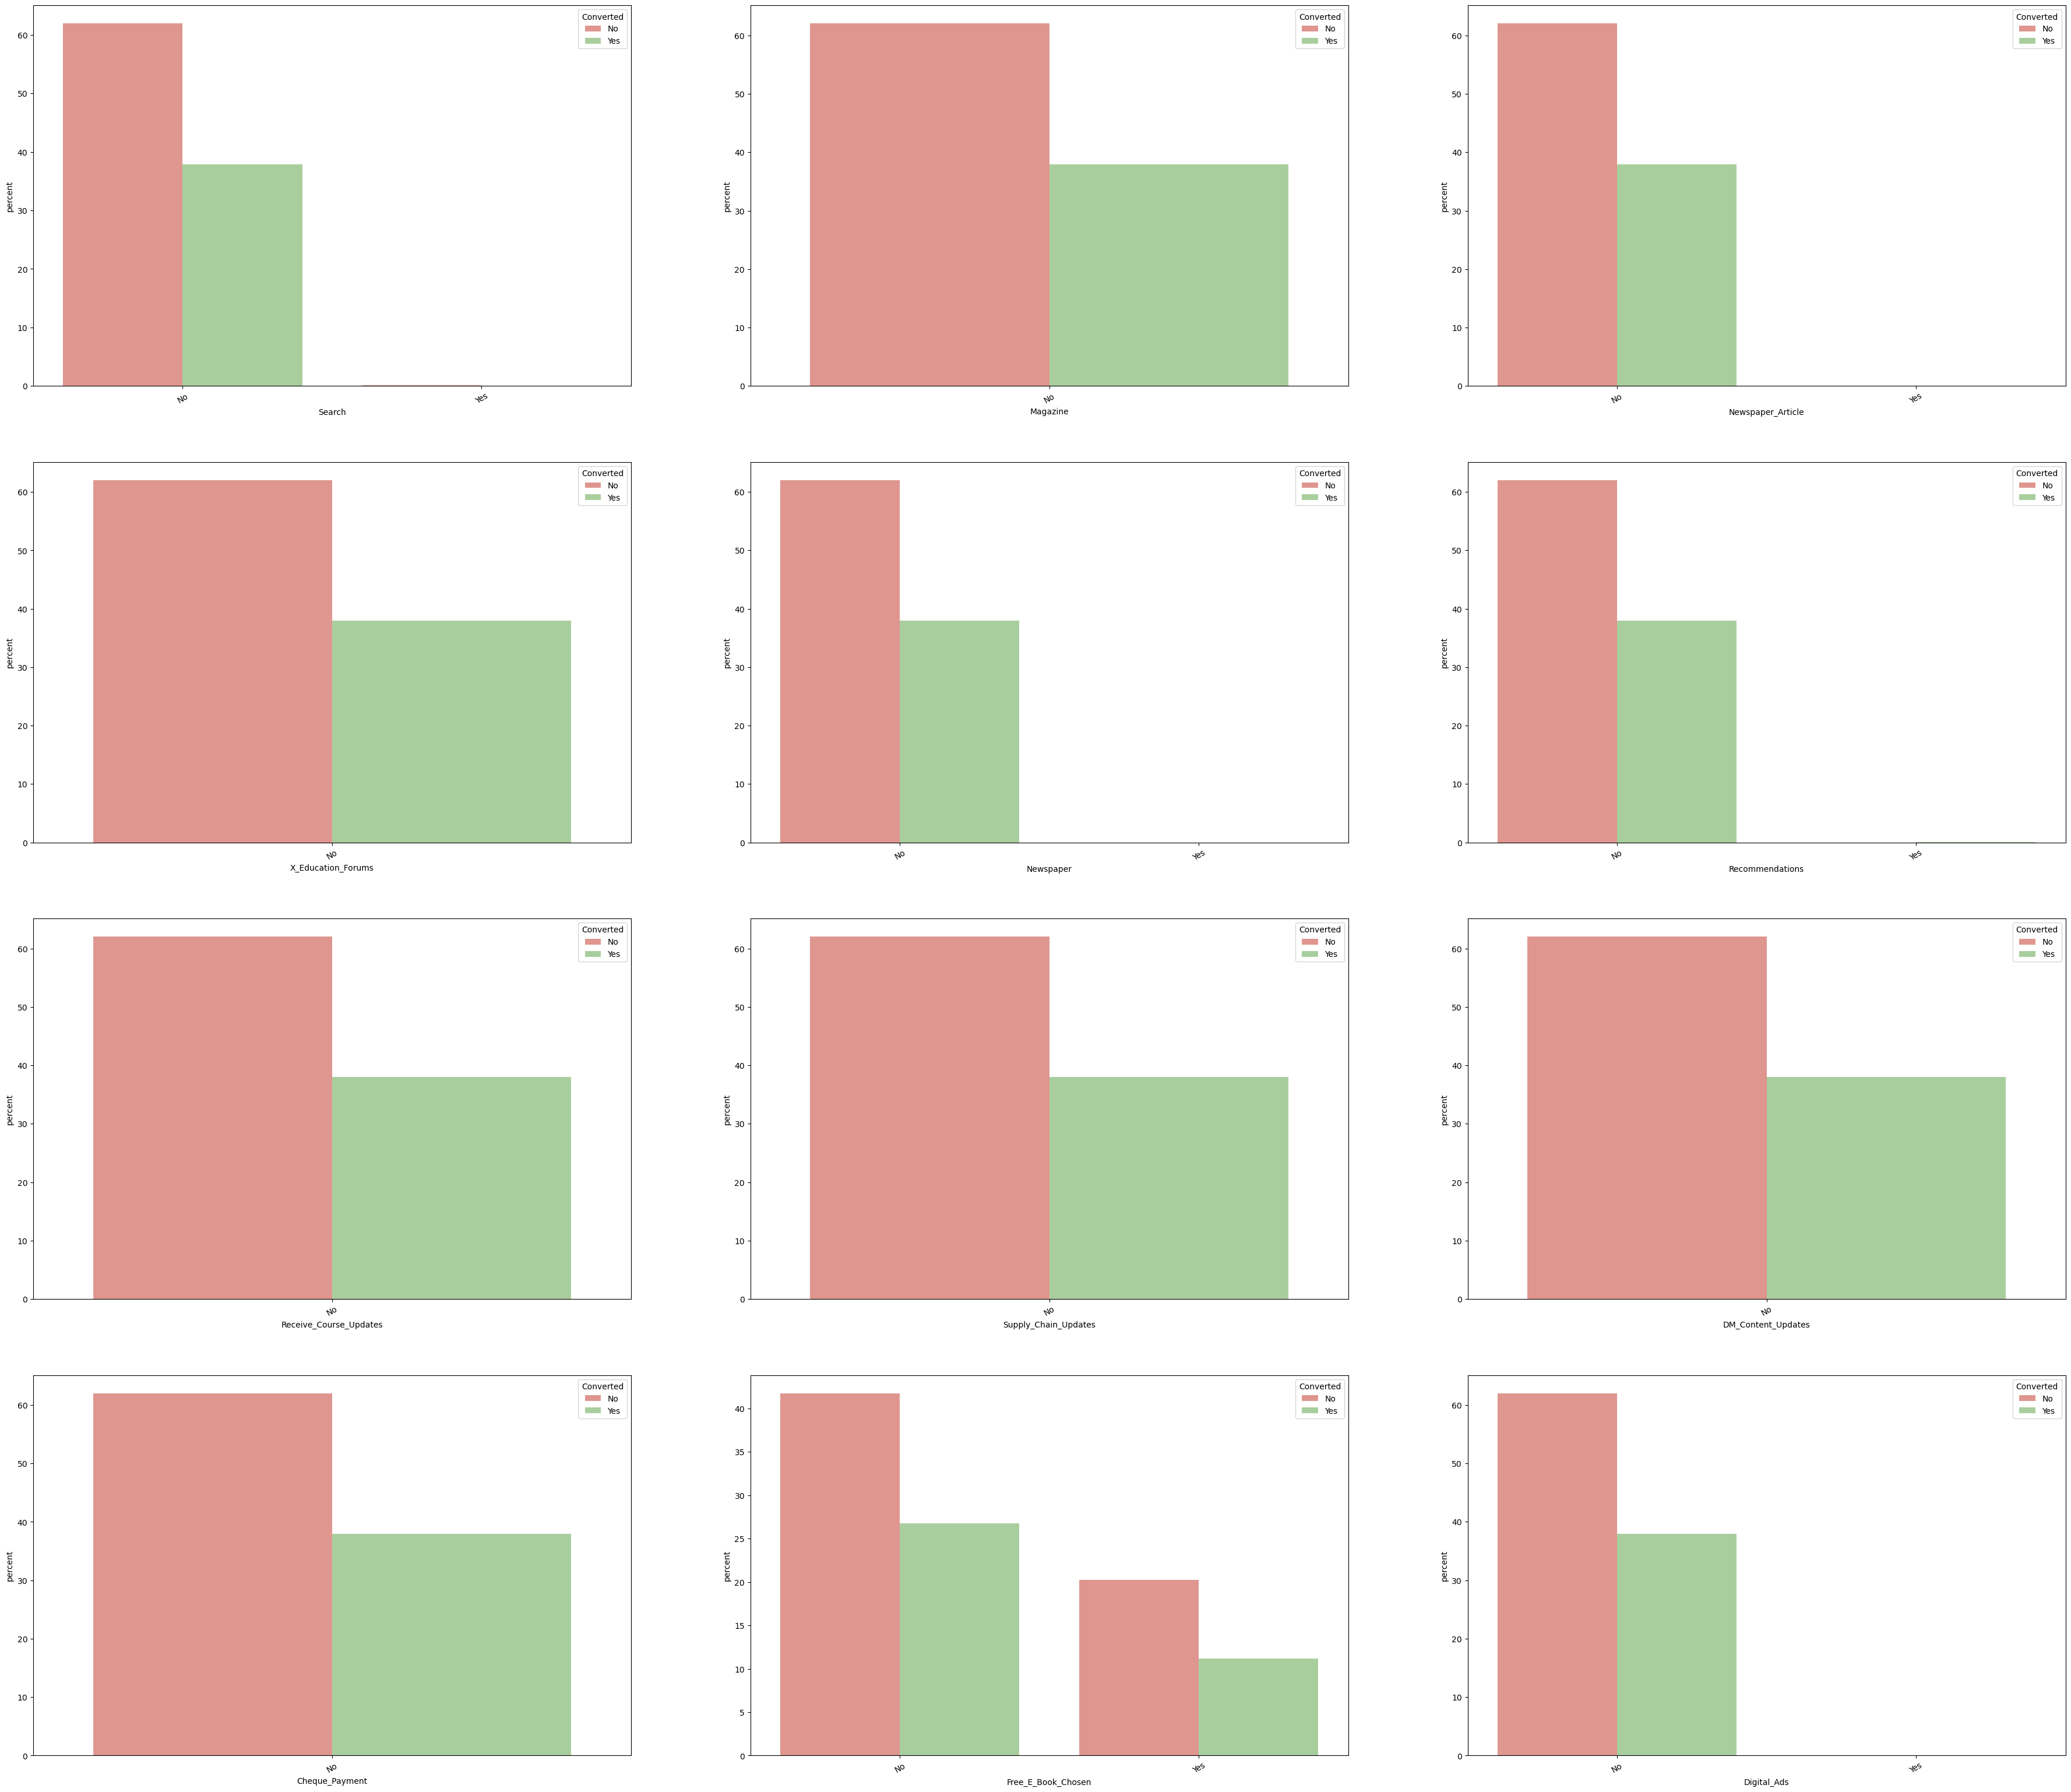

In [4763]:
# Plotting all the rest of the categorical variables for visualisation

plt.figure(figsize = (45,39))

plt.subplot(4,3,1)
sns.countplot(x = 'Search', hue = 'Converted', data = leads_copy, palette = ['#ec8b82', '#a4d696'],stat = 'percent')
xticks(rotation = 30)

plt.subplot(4,3,2)
sns.countplot(x = 'Magazine', hue = 'Converted', data = leads_copy, palette = ['#ec8b82', '#a4d696'],stat = 'percent')
xticks(rotation = 30)

plt.subplot(4,3,3)
sns.countplot(x = 'Newspaper_Article', hue = 'Converted', data = leads_copy, palette = ['#ec8b82', '#a4d696'],stat = 'percent')
xticks(rotation = 30)

plt.subplot(4,3,4)
sns.countplot(x = 'X_Education_Forums', hue = 'Converted', data = leads_copy, palette = ['#ec8b82', '#a4d696'],stat = 'percent')
xticks(rotation = 30)

plt.subplot(4,3,5)
sns.countplot(x = 'Newspaper', hue = 'Converted', data = leads_copy, palette = ['#ec8b82', '#a4d696'],stat = 'percent')
xticks(rotation = 30)

plt.subplot(4,3,6)
sns.countplot(x = 'Recommendations', hue = 'Converted', data = leads_copy, palette = ['#ec8b82', '#a4d696'],stat = 'percent')
xticks(rotation = 30)

plt.subplot(4,3,7)
sns.countplot(x = 'Receive_Course_Updates', hue = 'Converted', data = leads_copy, palette = ['#ec8b82', '#a4d696'],stat = 'percent')
xticks(rotation = 30)

plt.subplot(4,3,8)
sns.countplot(x = 'Supply_Chain_Updates', hue = 'Converted', data = leads_copy, palette = ['#ec8b82', '#a4d696'],stat = 'percent')
xticks(rotation = 30)

plt.subplot(4,3,9)
sns.countplot(x = 'DM_Content_Updates', hue = 'Converted', data = leads_copy, palette = ['#ec8b82', '#a4d696'],stat = 'percent')
xticks(rotation = 30)

plt.subplot(4,3,10)
sns.countplot(x = 'Cheque_Payment', hue = 'Converted', data = leads_copy, palette = ['#ec8b82', '#a4d696'],stat = 'percent')
xticks(rotation = 30)

plt.subplot(4,3,11)
sns.countplot(x = 'Free_E_Book_Chosen', hue = 'Converted', data = leads_copy, palette = ['#ec8b82', '#a4d696'],stat = 'percent')
xticks(rotation = 30)

plt.subplot(4,3,12)
sns.countplot(x = 'Digital_Ads', hue = 'Converted', data = leads_copy, palette = ['#ec8b82', '#a4d696'],stat = 'percent')
xticks(rotation = 30)

plt.show()

In [4764]:
# Except free-e-book chosen, no other column has proper representation in the data and is fully biased
# No stark difference in conversion behaviour was also seen
# These columns would not add any predictive power to the model
# Dropping all except free-e-book

In [4765]:
leads_copy.columns

Index(['Prospect_ID', 'Lead_Number', 'Lead_Origin', 'Lead_Source', 'Converted',
       'TotalVisits', 'Website_time', 'Views_Per_Visit', 'Specialization',
       'Current_Occupation', 'Search', 'Magazine', 'Newspaper_Article',
       'X_Education_Forums', 'Newspaper', 'Digital_Ads', 'Recommendations',
       'Receive_Course_Updates', 'Supply_Chain_Updates', 'DM_Content_Updates',
       'City', 'Cheque_Payment', 'Free_E_Book_Chosen'],
      dtype='object')

In [4766]:
leads_copy.drop(['Search',
       'Magazine', 'Newspaper_Article', 'X_Education_Forums', 'Newspaper',
       'Digital_Ads', 'Recommendations', 'Receive_Course_Updates',
       'Supply_Chain_Updates', 'DM_Content_Updates', 'Cheque_Payment'], axis = 1, inplace = True)

In [4767]:
leads_copy.head()

,Prospect_ID,Lead_Number,Lead_Origin,Lead_Source,Converted,TotalVisits,Website_time,Views_Per_Visit,Specialization,Current_Occupation,City,Free_E_Book_Chosen
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0.0,0,0.0,Other Specialization,Unemployed,Mumbai,No
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,5.0,674,2.5,Other Specialization,Unemployed,Mumbai,No
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,Yes,2.0,1532,2.0,Business Administration,Student,Mumbai,Yes
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,1.0,305,1.0,Media and Advertising,Unemployed,Mumbai,No
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,Yes,2.0,1428,1.0,Other Specialization,Unemployed,Mumbai,No


In [4768]:
leads_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9020 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Prospect_ID         9020 non-null   object 
 1   Lead_Number         9020 non-null   int64  
 2   Lead_Origin         9020 non-null   object 
 3   Lead_Source         9020 non-null   object 
 4   Converted           9020 non-null   object 
 5   TotalVisits         9020 non-null   float64
 6   Website_time        9020 non-null   int64  
 7   Views_Per_Visit     9020 non-null   float64
 8   Specialization      9020 non-null   object 
 9   Current_Occupation  9020 non-null   object 
 10  City                9020 non-null   object 
 11  Free_E_Book_Chosen  9020 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage: 916.1+ KB


In [4769]:
# dropping prospect_id AND lead number as they ARE unique identifiers
leads_copy.drop(['Prospect_ID', 'Lead_Number'], axis = 1, inplace = True)

--------

### <font color = Dark> *3. Data Preperation for Modelling* 

In [4772]:
leads_copy.columns

Index(['Lead_Origin', 'Lead_Source', 'Converted', 'TotalVisits',
       'Website_time', 'Views_Per_Visit', 'Specialization',
       'Current_Occupation', 'City', 'Free_E_Book_Chosen'],
      dtype='object')

In [4773]:
# Converting all the Yes and No columns to 1s and 0s

binary_list = ['Converted', 'Free_E_Book_Chosen']

def binary_map(x):
    return x.map({'Yes':1, 'No':0})

leads_copy[binary_list] = leads_copy[binary_list].apply(binary_map)

In [4774]:
# getting dummy variables for the columns

lead_dummy = pd.get_dummies(leads_copy[['Lead_Origin', 'Lead_Source', 'Specialization', 'Current_Occupation','City']])
lead_dummy = lead_dummy.astype(int)

In [4775]:
lead_dummy

,Lead_Origin_API,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Source_Direct Traffic,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Others,Lead_Source_Reference,Lead_Source_Referral Sites,Lead_Source_Welingak Website,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_Finance,Specialization_Human Resource,Specialization_International Business,Specialization_Marketing,Specialization_Media and Advertising,Specialization_Operations,Specialization_Other Management,Specialization_Other Specialization,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Current_Occupation_Businessman,Current_Occupation_Housewife,Current_Occupation_Other,Current_Occupation_Student,Current_Occupation_Unemployed,Current_Occupation_Working Professional,City_Mumbai,City_Other Cities,City_Thane & Outskirts
0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0
1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0
2,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
3,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
4,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0
9236,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
9237,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
9238,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [4776]:
# Concating the data frames first

leads = pd.concat([leads_copy, lead_dummy], axis = 1)
leads

,Lead_Origin,Lead_Source,Converted,TotalVisits,Website_time,Views_Per_Visit,Specialization,Current_Occupation,City,Free_E_Book_Chosen,Lead_Origin_API,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Source_Direct Traffic,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Others,Lead_Source_Reference,Lead_Source_Referral Sites,Lead_Source_Welingak Website,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_Finance,Specialization_Human Resource,Specialization_International Business,Specialization_Marketing,Specialization_Media and Advertising,Specialization_Operations,Specialization_Other Management,Specialization_Other Specialization,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Current_Occupation_Businessman,Current_Occupation_Housewife,Current_Occupation_Other,Current_Occupation_Student,Current_Occupation_Unemployed,Current_Occupation_Working Professional,City_Mumbai,City_Other Cities,City_Thane & Outskirts
0,API,Olark Chat,0,0.0,0,0.00,Other Specialization,Unemployed,Mumbai,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0
1,API,Organic Search,0,5.0,674,2.50,Other Specialization,Unemployed,Mumbai,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.00,Business Administration,Student,Mumbai,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.00,Media and Advertising,Unemployed,Mumbai,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
4,Landing Page Submission,Google,1,2.0,1428,1.00,Other Specialization,Unemployed,Mumbai,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,1,8.0,1845,2.67,Other Management,Unemployed,Mumbai,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0
9236,Landing Page Submission,Direct Traffic,0,2.0,238,2.00,Media and Advertising,Unemployed,Mumbai,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
9237,Landing Page Submission,Direct Traffic,0,2.0,199,2.00,Business Administration,Unemployed,Mumbai,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
9238,Landing Page Submission,Google,1,3.0,499,3.00,Human Resource,Unemployed,Other Cities,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [4777]:
# Dropping all the original categorical variables
# Dropping Lead_Source_Others 
# Keeping all dummies from Lead_Origin
# Dropping the "Unemployed" dummy as the baseline
# Dropping the "Other Specialisation" dummy as the baseline
# Dropping the "Mumbai" dummy as the baseline

In [4778]:
leads.columns

Index(['Lead_Origin', 'Lead_Source', 'Converted', 'TotalVisits',
       'Website_time', 'Views_Per_Visit', 'Specialization',
       'Current_Occupation', 'City', 'Free_E_Book_Chosen', 'Lead_Origin_API',
       'Lead_Origin_Landing Page Submission', 'Lead_Origin_Lead Add Form',
       'Lead_Origin_Lead Import', 'Lead_Source_Direct Traffic',
       'Lead_Source_Google', 'Lead_Source_Olark Chat',
       'Lead_Source_Organic Search', 'Lead_Source_Others',
       'Lead_Source_Reference', 'Lead_Source_Referral Sites',
       'Lead_Source_Welingak Website',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_Finance', 'Specialization_Human Resource',
       'Specialization_International Business', 'Specialization_Marketing',
       'Specialization_Media and Advertising', 'Specialization_Operations',
       'Specialization_Other Management',
       'Specialization_Other Specialization',


In [4779]:
leads.drop(['Lead_Origin', 'Lead_Source', 'Specialization', 'Current_Occupation','City', 
            'Lead_Source_Others', 'Current_Occupation_Unemployed', 
            'Specialization_Other Specialization', 'City_Mumbai'], axis = 1, inplace  = True)

In [4780]:
# Train-test split of the data

X = leads.drop(['Converted'], axis = 1)
X.head()

,TotalVisits,Website_time,Views_Per_Visit,Free_E_Book_Chosen,Lead_Origin_API,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Source_Direct Traffic,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Reference,Lead_Source_Referral Sites,Lead_Source_Welingak Website,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_Finance,Specialization_Human Resource,Specialization_International Business,Specialization_Marketing,Specialization_Media and Advertising,Specialization_Operations,Specialization_Other Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Current_Occupation_Businessman,Current_Occupation_Housewife,Current_Occupation_Other,Current_Occupation_Student,Current_Occupation_Working Professional,City_Other Cities,City_Thane & Outskirts
0,0.0,0,0.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5.0,674,2.5,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,1.0,305,1.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,2.0,1428,1.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4781]:
y = leads['Converted']

In [4782]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 44)

In [4783]:
X_train.shape

(6314, 35)

In [4784]:
X_test.shape

(2706, 35)

In [4785]:
y_train.shape

(6314,)

In [4786]:
y_test.shape

(2706,)

In [4787]:
# Standardising the Numerical Variables using MinMax Scaler
scaler = StandardScaler()

In [4788]:
X_train[['TotalVisits', 'Website_time', 'Views_Per_Visit']] = scaler.fit_transform(X_train[['TotalVisits', 'Website_time', 'Views_Per_Visit']])

In [4789]:
X_train.head()

,TotalVisits,Website_time,Views_Per_Visit,Free_E_Book_Chosen,Lead_Origin_API,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Source_Direct Traffic,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Reference,Lead_Source_Referral Sites,Lead_Source_Welingak Website,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_Finance,Specialization_Human Resource,Specialization_International Business,Specialization_Marketing,Specialization_Media and Advertising,Specialization_Operations,Specialization_Other Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Current_Occupation_Businessman,Current_Occupation_Housewife,Current_Occupation_Other,Current_Occupation_Student,Current_Occupation_Working Professional,City_Other Cities,City_Thane & Outskirts
8181,-1.066826,-0.872898,-1.131448,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3241,0.259473,0.918348,-0.486747,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2124,0.591047,1.682342,-0.321936,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5194,1.585771,-0.766122,0.807503,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1166,-1.066826,-0.872898,-1.131448,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


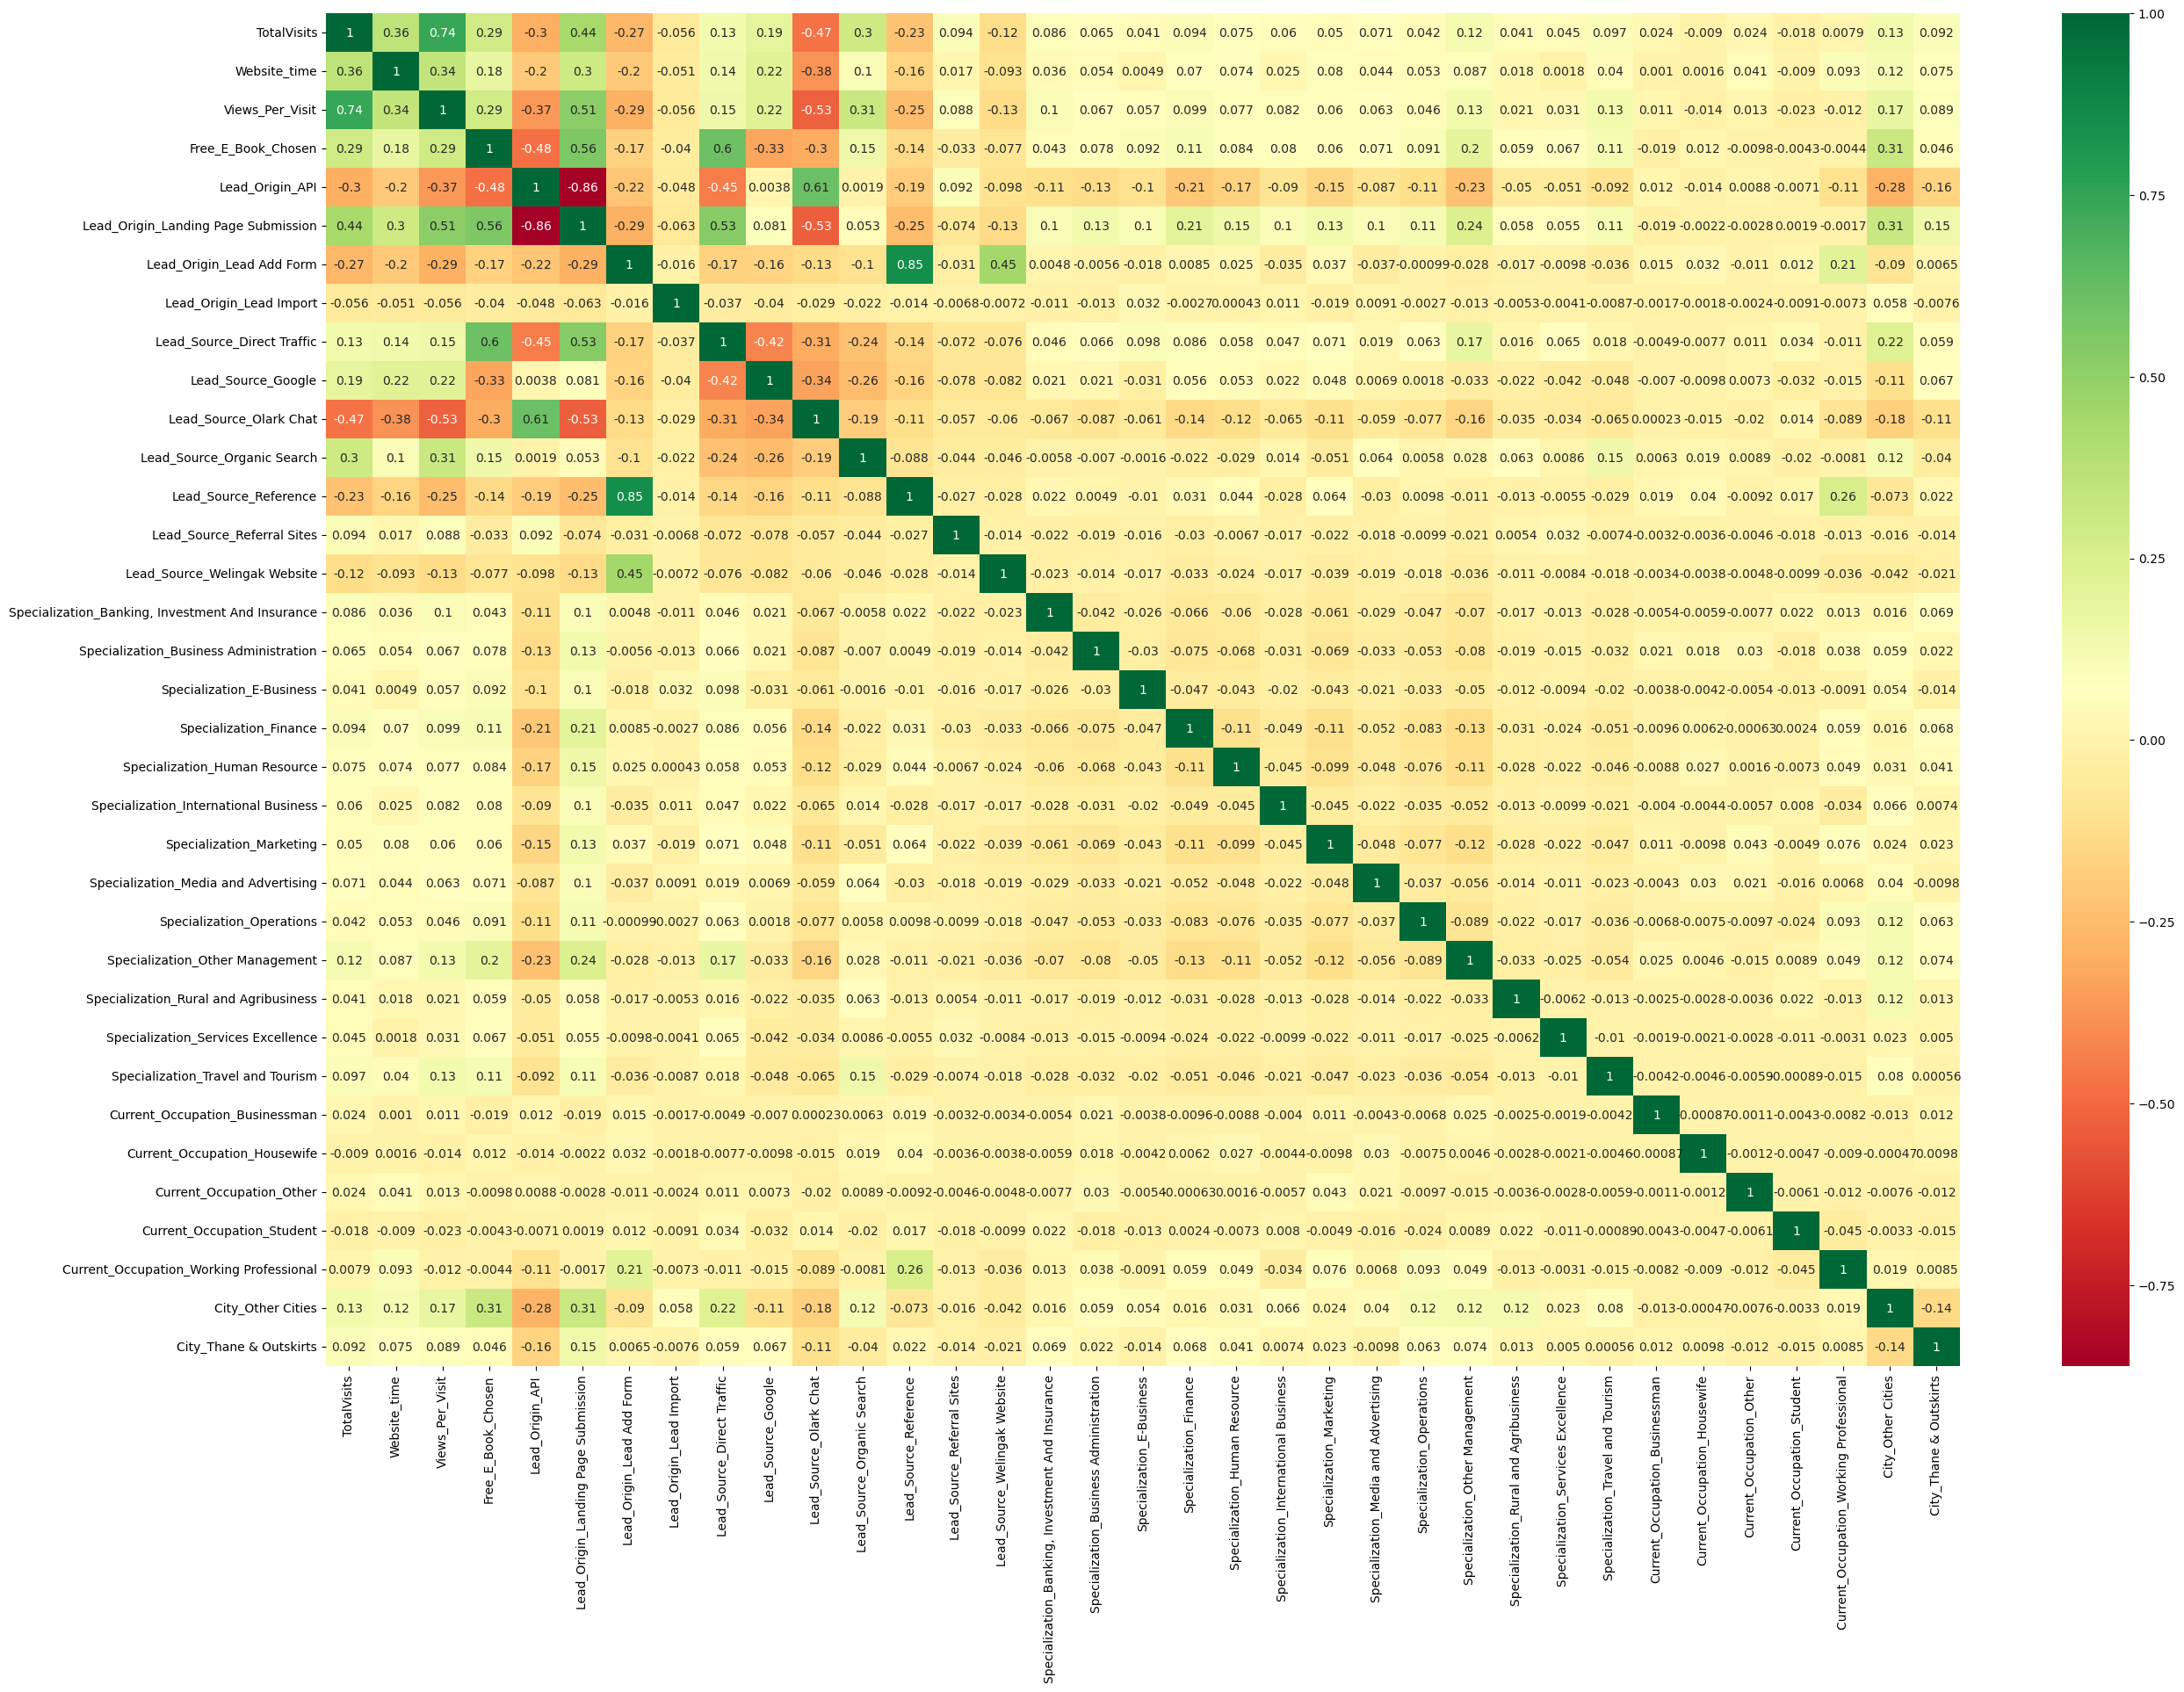

In [4790]:
# Looking at correlations

plt.figure(figsize = (30,20))
sns.heatmap(X_train.corr(), annot = True, cmap = 'RdYlGn')
plt.show()

In [4791]:
# Lead_Source_Reference	 and Lead_Origin_Lead Add Form	are highly correlated. 
# It's possible that for reference, the lead add form is filled so they represent the same info
# Dropping, Lead_Origin_Lead Add Form

# Will use RFE later to choose between Lead_Origin_Landing Page Submission	and API as they too have high correlation

In [4792]:
X_test = X_test.drop(['Lead_Origin_Lead Add Form'], axis = 1)
X_train = X_train.drop(['Lead_Origin_Lead Add Form'], axis = 1)

In [4793]:
X_train.head()

,TotalVisits,Website_time,Views_Per_Visit,Free_E_Book_Chosen,Lead_Origin_API,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Import,Lead_Source_Direct Traffic,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Reference,Lead_Source_Referral Sites,Lead_Source_Welingak Website,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_Finance,Specialization_Human Resource,Specialization_International Business,Specialization_Marketing,Specialization_Media and Advertising,Specialization_Operations,Specialization_Other Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Current_Occupation_Businessman,Current_Occupation_Housewife,Current_Occupation_Other,Current_Occupation_Student,Current_Occupation_Working Professional,City_Other Cities,City_Thane & Outskirts
8181,-1.066826,-0.872898,-1.131448,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3241,0.259473,0.918348,-0.486747,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2124,0.591047,1.682342,-0.321936,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5194,1.585771,-0.766122,0.807503,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1166,-1.066826,-0.872898,-1.131448,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4794]:
X_train.shape

(6314, 34)

-----

### <font color = Dark> *4. Modelling* 

In [4797]:
leads_mod1 = sm.GLM(y_train, (sm.add_constant(X_train)), families = sm.families.Binomial())
leads_mod1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6314
Model:                            GLM   Df Residuals:                     6279
Model Family:                Gaussian   Df Model:                           34
Link Function:               Identity   Scale:                         0.15294
Method:                          IRLS   Log-Likelihood:                -3013.6
Date:                Tue, 18 Feb 2025   Deviance:                       960.29
Time:                        17:01:38   Pearson chi2:                     960.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.4200
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                                0.8513      0.123      6.896      0.000       0.609       1.093
TotalVisits                                          0.0361      0.008      4.724      0.000       0.021       0.051
Website_time                                         0.2074      0.006     36.598      0.000       0.196       0.219
Views_Per_Visit                                     -0.0255      0.008     -3.109      0.002      -0.042      -0.009
Free_E_Book_Chosen                                  -0.0370      0.016     -2.352      0.019      -0.068      -0.006
Lead_Origin_API                                     -0.7098      0.082     -8.700      0.000      -0.870      -0.550
Lead_Origin_Landing Page Submission                 -0.8091      0.082     -9.816      0.000      -0.971      -0.648
Lead_Origin_Lead Import                             -0.4997      0.149     -3.356      0.001      -0.792      -0.208
Lead_Source_Direct Traffic                           0.0606      0.103      0.591      0.554      -0.140       0.262
Lead_Source_Google                                   0.1099      0.102      1.077      0.282      -0.090       0.310
Lead_Source_Olark Chat                               0.2409      0.103      2.332      0.020       0.038       0.443
Lead_Source_Organic Search                           0.1100      0.103      1.069      0.285      -0.092       0.312
Lead_Source_Reference                               -0.0232      0.125     -0.185      0.853      -0.269       0.222
Lead_Source_Referral Sites                           0.0597      0.111      0.538      0.590      -0.158       0.277
Lead_Source_Welingak Website                         0.2852      0.130      2.201      0.028       0.031       0.539
Specialization_Banking, Investment And Insurance     0.1976      0.031      6.287      0.000       0.136       0.259
Specialization_Business Administration               0.1446      0.029      4.963      0.000       0.088       0.202
Specialization_E-Business                            0.1532      0.041      3.744      0.000       0.073       0.233
Specialization_Finance                               0.1479      0.023      6.332      0.000       0.102       0.194
Specialization_Human Resource                        0.1431      0.024      6.038      0.000       0.097       0.190
Specialization_International Business                0.1504      0.039      3.835      0.000       0.074       0.227
Specialization_Marketing                             0.1666      0.023      7.137      0.000       0.121       0.212
Specialization_Media and Advertising                 0.1875      0.037      5.026      0.000       0.114       0.261
Specialization_Operations                

In [4798]:
# feature selection using RFE
logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select = 15)
rfe = rfe.fit(X_train, y_train)

In [4799]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 16),
 ('Website_time', True, 1),
 ('Views_Per_Visit', False, 17),
 ('Free_E_Book_Chosen', False, 15),
 ('Lead_Origin_API', True, 1),
 ('Lead_Origin_Landing Page Submission', True, 1),
 ('Lead_Origin_Lead Import', True, 1),
 ('Lead_Source_Direct Traffic', False, 9),
 ('Lead_Source_Google', False, 19),
 ('Lead_Source_Olark Chat', True, 1),
 ('Lead_Source_Organic Search', False, 18),
 ('Lead_Source_Reference', True, 1),
 ('Lead_Source_Referral Sites', False, 12),
 ('Lead_Source_Welingak Website', True, 1),
 ('Specialization_Banking, Investment And Insurance', True, 1),
 ('Specialization_Business Administration', False, 3),
 ('Specialization_E-Business', False, 5),
 ('Specialization_Finance', True, 1),
 ('Specialization_Human Resource', False, 4),
 ('Specialization_International Business', False, 2),
 ('Specialization_Marketing', True, 1),
 ('Specialization_Media and Advertising', True, 1),
 ('Specialization_Operations', True, 1),
 ('Specialization_Other Management'

In [4800]:
col = X_train.columns[rfe.support_]

In [4801]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Views_Per_Visit', 'Free_E_Book_Chosen',
       'Lead_Source_Direct Traffic', 'Lead_Source_Google',
       'Lead_Source_Organic Search', 'Lead_Source_Referral Sites',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_Human Resource',
       'Specialization_International Business',
       'Specialization_Other Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence', 'Current_Occupation_Businessman',
       'Current_Occupation_Other', 'Current_Occupation_Student',
       'City_Other Cities', 'City_Thane & Outskirts'],
      dtype='object')

In [4802]:
# 2nd model
X_train_sm = sm.add_constant(X_train[col])
leads_mod2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
leads_mod2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6314
Model:                            GLM   Df Residuals:                     6298
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2963.7
Date:                Tue, 18 Feb 2025   Deviance:                       5927.3
Time:                        17:01:38   Pearson chi2:                 6.62e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3220
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                                2.7286      0.625      4.364      0.000       1.503       3.954
Website_time                                         1.1300      0.038     29.858      0.000       1.056       1.204
Lead_Origin_API                                     -3.9001      0.630     -6.189      0.000      -5.135      -2.665
Lead_Origin_Landing Page Submission                 -4.1501      0.629     -6.598      0.000      -5.383      -2.917
Lead_Origin_Lead Import                             -2.9542      0.800     -3.692      0.000      -4.523      -1.386
Lead_Source_Olark Chat                               0.7829      0.110      7.122      0.000       0.567       0.998
Lead_Source_Reference                                0.2645      0.668      0.396      0.692      -1.045       1.574
Lead_Source_Welingak Website                         2.7020      1.184      2.282      0.022       0.382       5.022
Specialization_Banking, Investment And Insurance     0.6262      0.173      3.627      0.000       0.288       0.965
Specialization_Finance                               0.3015      0.114      2.653      0.008       0.079       0.524
Specialization_Marketing                             0.4028      0.117      3.441      0.001       0.173       0.632
Specialization_Media and Advertising                 0.5152      0.212      2.433      0.015       0.100       0.930
Specialization_Operations                            0.4422      0.147      2.999      0.003       0.153       0.731
Specialization_Travel and Tourism                    0.3450      0.217      1.590      0.112      -0.080       0.770
Current_Occupation_Housewife                        23.1263   1.62e+04      0.001      0.999   -3.17e+04    3.17e+04
Current_Occupation_Working Professional              2.8922      0.181     15.990      0.000       2.538       3.247
====================================================================================================================
"""

In [4803]:
# defining a general VIF calculator function
def VIF_Calculator(df):
    vif = pd.DataFrame()
    X = df
    vif["Features"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif["VIF"] = round(vif["VIF"],2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [4804]:
VIF_Calculator(X_train[col])

,Features,VIF
4,Lead_Source_Olark Chat,2.26
1,Lead_Origin_API,2.08
2,Lead_Origin_Landing Page Submission,1.77
0,Website_time,1.28
8,Specialization_Finance,1.27
9,Specialization_Marketing,1.22
5,Lead_Source_Reference,1.21
14,Current_Occupation_Working Professional,1.21
11,Specialization_Operations,1.14
7,"Specialization_Banking, Investment And Insurance",1.09


In [4805]:
# All variables chosen have <3 VIF which means there is less multicollinearity

In [4806]:
# Getting the predicted values on the training set
y_train_pred = leads_mod2.fit().predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)

# defining a function to call the Prediction table each time
y_train_pred_final = pd.DataFrame({'User_num': y_train.index, 'Converted':y_train.values, 'Converted_prob':y_train_pred})
    
# Creating new column 'Prediction' with 1 if Converted_prob > 0.5 else 0
y_train_pred_final['Prediction'] = y_train_pred_final['Converted_prob'].apply(lambda x: 1 if x > 0.5 else 0)
    
y_train_pred_final.head()

,User_num,Converted,Converted_prob,Prediction
0,8181,0,0.881504,1
1,3241,1,0.405220,0
2,2124,1,0.617641,1
3,5194,1,0.155499,0
4,1166,1,0.201831,0


In [4807]:
# metrics function 

def model_metrics(y_train_pred_final):
    confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Prediction)
    accuracy = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Prediction)
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives

    Sensitivity = TP/float(TP + FN)
    Specificity = TN / float(TN + FP)
    False_positive_Rate = 1-Specificity
    Precision = TP/float(TP+FP)

    print("Confusion Matrix\n\n", confusion)
    print("\n")
    print("Accuracy Score:", round(accuracy,2))
    print("Sensitivity:", round(Sensitivity,2))
    print("Specificity:", round(Specificity,2))
    print("FPR:", round(False_positive_Rate,2))
    print("Precision:", round(Precision,2))

In [4808]:
model_metrics(y_train_pred_final)

Confusion Matrix

 [[3477  443]
 [ 894 1500]]


Accuracy Score: 0.79
Sensitivity: 0.63
Specificity: 0.89
FPR: 0.11
Precision: 0.77


In [4809]:
# The VIF values of the model are within the accepted range (<5)
# One of the variables has a p-value of 0.999 and is insignificant, so removing that column

col = col.drop('Current_Occupation_Housewife')

In [4810]:
# 3rd model
X_train_sm = sm.add_constant(X_train[col])
leads_mod3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
leads_mod3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6314
Model:                            GLM   Df Residuals:                     6299
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2968.9
Date:                Tue, 18 Feb 2025   Deviance:                       5937.7
Time:                        17:01:39   Pearson chi2:                 6.63e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3208
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                                2.7281      0.625      4.364      0.000       1.503       3.953
Website_time                                         1.1288      0.038     29.857      0.000       1.055       1.203
Lead_Origin_API                                     -3.8971      0.630     -6.185      0.000      -5.132      -2.662
Lead_Origin_Landing Page Submission                 -4.1418      0.629     -6.586      0.000      -5.374      -2.909
Lead_Origin_Lead Import                             -2.9537      0.800     -3.691      0.000      -4.522      -1.385
Lead_Source_Olark Chat                               0.7802      0.110      7.101      0.000       0.565       0.996
Lead_Source_Reference                                0.2773      0.668      0.415      0.678      -1.032       1.586
Lead_Source_Welingak Website                         2.7017      1.184      2.282      0.022       0.382       5.022
Specialization_Banking, Investment And Insurance     0.6196      0.173      3.590      0.000       0.281       0.958
Specialization_Finance                               0.2958      0.114      2.606      0.009       0.073       0.518
Specialization_Marketing                             0.3965      0.117      3.390      0.001       0.167       0.626
Specialization_Media and Advertising                 0.5178      0.211      2.457      0.014       0.105       0.931
Specialization_Operations                            0.4360      0.147      2.959      0.003       0.147       0.725
Specialization_Travel and Tourism                    0.3383      0.217      1.560      0.119      -0.087       0.763
Current_Occupation_Working Professional              2.8887      0.181     15.974      0.000       2.534       3.243
====================================================================================================================
"""

In [4811]:
VIF_Calculator(X_train[col])

,Features,VIF
4,Lead_Source_Olark Chat,2.26
1,Lead_Origin_API,2.08
2,Lead_Origin_Landing Page Submission,1.76
0,Website_time,1.28
8,Specialization_Finance,1.27
9,Specialization_Marketing,1.22
5,Lead_Source_Reference,1.21
13,Current_Occupation_Working Professional,1.21
11,Specialization_Operations,1.14
7,"Specialization_Banking, Investment And Insurance",1.09


In [4812]:
# dropping Lead_Source_Reference for higher p_values
col = col.drop('Lead_Source_Reference')

In [4813]:
# 4th model
X_train_sm = sm.add_constant(X_train[col])
leads_mod4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
leads_mod4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6314
Model:                            GLM   Df Residuals:                     6300
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2968.9
Date:                Tue, 18 Feb 2025   Deviance:                       5937.9
Time:                        17:01:39   Pearson chi2:                 6.62e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3208
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                                2.9734      0.224     13.280      0.000       2.535       3.412
Website_time                                         1.1289      0.038     29.856      0.000       1.055       1.203
Lead_Origin_API                                     -4.1425      0.237    -17.472      0.000      -4.607      -3.678
Lead_Origin_Landing Page Submission                 -4.3875      0.232    -18.939      0.000      -4.842      -3.933
Lead_Origin_Lead Import                             -3.1992      0.547     -5.849      0.000      -4.271      -2.127
Lead_Source_Olark Chat                               0.7801      0.110      7.100      0.000       0.565       0.995
Lead_Source_Welingak Website                         2.4564      1.030      2.385      0.017       0.438       4.475
Specialization_Banking, Investment And Insurance     0.6204      0.173      3.595      0.000       0.282       0.959
Specialization_Finance                               0.2966      0.113      2.614      0.009       0.074       0.519
Specialization_Marketing                             0.3974      0.117      3.399      0.001       0.168       0.627
Specialization_Media and Advertising                 0.5182      0.211      2.459      0.014       0.105       0.931
Specialization_Operations                            0.4362      0.147      2.960      0.003       0.147       0.725
Specialization_Travel and Tourism                    0.3387      0.217      1.562      0.118      -0.086       0.764
Current_Occupation_Working Professional              2.8893      0.181     15.979      0.000       2.535       3.244
====================================================================================================================
"""

In [4814]:
VIF_Calculator(X_train[col])

,Features,VIF
4,Lead_Source_Olark Chat,2.26
1,Lead_Origin_API,2.07
2,Lead_Origin_Landing Page Submission,1.73
7,Specialization_Finance,1.25
0,Website_time,1.23
8,Specialization_Marketing,1.19
10,Specialization_Operations,1.13
12,Current_Occupation_Working Professional,1.10
6,"Specialization_Banking, Investment And Insurance",1.08
9,Specialization_Media and Advertising,1.06


In [4815]:
# dropping Specialization_Travel and Tourism for higher p_values
col = col.drop('Specialization_Travel and Tourism')

In [4816]:
# 5th model
X_train_sm = sm.add_constant(X_train[col])
leads_mod5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
leads_mod5.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6314
Model:                            GLM   Df Residuals:                     6301
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2970.1
Date:                Tue, 18 Feb 2025   Deviance:                       5940.3
Time:                        17:01:39   Pearson chi2:                 6.62e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3206
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                                2.9783      0.224     13.304      0.000       2.540       3.417
Website_time                                         1.1291      0.038     29.871      0.000       1.055       1.203
Lead_Origin_API                                     -4.1426      0.237    -17.475      0.000      -4.607      -3.678
Lead_Origin_Landing Page Submission                 -4.3705      0.231    -18.895      0.000      -4.824      -3.917
Lead_Origin_Lead Import                             -3.1997      0.547     -5.851      0.000      -4.272      -2.128
Lead_Source_Olark Chat                               0.7780      0.110      7.085      0.000       0.563       0.993
Lead_Source_Welingak Website                         2.4522      1.030      2.381      0.017       0.434       4.471
Specialization_Banking, Investment And Insurance     0.6011      0.172      3.494      0.000       0.264       0.938
Specialization_Finance                               0.2769      0.113      2.457      0.014       0.056       0.498
Specialization_Marketing                             0.3788      0.116      3.259      0.001       0.151       0.607
Specialization_Media and Advertising                 0.4986      0.210      2.370      0.018       0.086       0.911
Specialization_Operations                            0.4177      0.147      2.845      0.004       0.130       0.706
Current_Occupation_Working Professional              2.8870      0.181     15.969      0.000       2.533       3.241
====================================================================================================================
"""

In [4817]:
VIF_Calculator(X_train[col])

,Features,VIF
4,Lead_Source_Olark Chat,2.26
1,Lead_Origin_API,2.07
2,Lead_Origin_Landing Page Submission,1.64
7,Specialization_Finance,1.24
0,Website_time,1.23
8,Specialization_Marketing,1.18
10,Specialization_Operations,1.12
11,Current_Occupation_Working Professional,1.09
6,"Specialization_Banking, Investment And Insurance",1.07
9,Specialization_Media and Advertising,1.06


In [4818]:
# dropping Specialization_Travel and Tourism for higher p_values
col = col.drop('Specialization_Media and Advertising')

In [4819]:
# 6th model
X_train_sm = sm.add_constant(X_train[col])
leads_mod6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
leads_mod6.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6314
Model:                            GLM   Df Residuals:                     6302
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2972.9
Date:                Tue, 18 Feb 2025   Deviance:                       5945.7
Time:                        17:01:40   Pearson chi2:                 6.62e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3200
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                                2.9868      0.224     13.344      0.000       2.548       3.426
Website_time                                         1.1293      0.038     29.903      0.000       1.055       1.203
Lead_Origin_API                                     -4.1446      0.237    -17.487      0.000      -4.609      -3.680
Lead_Origin_Landing Page Submission                 -4.3482      0.231    -18.825      0.000      -4.801      -3.896
Lead_Origin_Lead Import                             -3.1788      0.547     -5.816      0.000      -4.250      -2.107
Lead_Source_Olark Chat                               0.7760      0.110      7.072      0.000       0.561       0.991
Lead_Source_Welingak Website                         2.4446      1.030      2.374      0.018       0.426       4.463
Specialization_Banking, Investment And Insurance     0.5737      0.172      3.343      0.001       0.237       0.910
Specialization_Finance                               0.2485      0.112      2.219      0.027       0.029       0.468
Specialization_Marketing                             0.3521      0.116      3.045      0.002       0.125       0.579
Specialization_Operations                            0.3909      0.146      2.672      0.008       0.104       0.678
Current_Occupation_Working Professional              2.8942      0.181     16.014      0.000       2.540       3.248
====================================================================================================================
"""

In [4820]:
VIF_Calculator(X_train[col])

,Features,VIF
4,Lead_Source_Olark Chat,2.26
1,Lead_Origin_API,2.07
2,Lead_Origin_Landing Page Submission,1.57
0,Website_time,1.23
7,Specialization_Finance,1.23
8,Specialization_Marketing,1.17
9,Specialization_Operations,1.12
10,Current_Occupation_Working Professional,1.09
6,"Specialization_Banking, Investment And Insurance",1.07
5,Lead_Source_Welingak Website,1.01


In [4821]:
# dropping Specialization_Finance for higher p_values
col = col.drop('Specialization_Finance')

In [4822]:
# 7th Model
X_train_sm = sm.add_constant(X_train[col])
leads_mod7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
leads_mod7.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6314
Model:                            GLM   Df Residuals:                     6303
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2975.3
Date:                Tue, 18 Feb 2025   Deviance:                       5950.6
Time:                        17:01:40   Pearson chi2:                 6.63e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3194
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                                3.0153      0.223     13.495      0.000       2.577       3.453
Website_time                                         1.1290      0.038     29.936      0.000       1.055       1.203
Lead_Origin_API                                     -4.1625      0.237    -17.578      0.000      -4.627      -3.698
Lead_Origin_Landing Page Submission                 -4.3245      0.231    -18.760      0.000      -4.776      -3.873
Lead_Origin_Lead Import                             -3.1814      0.547     -5.820      0.000      -4.253      -2.110
Lead_Source_Olark Chat                               0.7723      0.110      7.048      0.000       0.558       0.987
Lead_Source_Welingak Website                         2.4214      1.030      2.351      0.019       0.403       4.440
Specialization_Banking, Investment And Insurance     0.5272      0.170      3.098      0.002       0.194       0.861
Specialization_Marketing                             0.3066      0.114      2.697      0.007       0.084       0.530
Specialization_Operations                            0.3453      0.145      2.386      0.017       0.062       0.629
Current_Occupation_Working Professional              2.9108      0.181     16.110      0.000       2.557       3.265
====================================================================================================================
"""

In [4823]:
VIF_Calculator(X_train[col])

,Features,VIF
4,Lead_Source_Olark Chat,2.26
1,Lead_Origin_API,2.06
2,Lead_Origin_Landing Page Submission,1.32
0,Website_time,1.23
7,Specialization_Marketing,1.14
8,Specialization_Operations,1.10
9,Current_Occupation_Working Professional,1.08
6,"Specialization_Banking, Investment And Insurance",1.06
5,Lead_Source_Welingak Website,1.01
3,Lead_Origin_Lead Import,1.00


In [4824]:
# dropping Lead_Source_Welingak Website for higher p_values
col = col.drop('Lead_Source_Welingak Website')

In [4825]:
# 8th Model
X_train_sm = sm.add_constant(X_train[col])
leads_mod8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
leads_mod8.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6314
Model:                            GLM   Df Residuals:                     6304
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2981.1
Date:                Tue, 18 Feb 2025   Deviance:                       5962.1
Time:                        17:01:40   Pearson chi2:                 6.82e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3182
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                                3.3703      0.215     15.648      0.000       2.948       3.792
Website_time                                         1.1289      0.038     29.935      0.000       1.055       1.203
Lead_Origin_API                                     -4.5167      0.229    -19.689      0.000      -4.966      -4.067
Lead_Origin_Landing Page Submission                 -4.6773      0.223    -20.954      0.000      -5.115      -4.240
Lead_Origin_Lead Import                             -3.5362      0.543     -6.508      0.000      -4.601      -2.471
Lead_Source_Olark Chat                               0.7718      0.110      7.045      0.000       0.557       0.987
Specialization_Banking, Investment And Insurance     0.5211      0.171      3.056      0.002       0.187       0.855
Specialization_Marketing                             0.2974      0.114      2.607      0.009       0.074       0.521
Specialization_Operations                            0.3417      0.145      2.359      0.018       0.058       0.626
Current_Occupation_Working Professional              2.9039      0.181     16.055      0.000       2.549       3.258
====================================================================================================================
"""

In [4826]:
VIF_Calculator(X_train[col])

,Features,VIF
4,Lead_Source_Olark Chat,2.25
1,Lead_Origin_API,2.06
2,Lead_Origin_Landing Page Submission,1.32
0,Website_time,1.21
6,Specialization_Marketing,1.14
7,Specialization_Operations,1.10
8,Current_Occupation_Working Professional,1.08
5,"Specialization_Banking, Investment And Insurance",1.06
3,Lead_Origin_Lead Import,1.00


In [4827]:
# Let's check the model metrics for this model as all the values are significant and has only 9 variables

In [4828]:
# Getting the predicted values on the training set
y_train_pred = leads_mod8.fit().predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)

# defining a function to call the Prediction table each time
y_train_pred_final = pd.DataFrame({'User_num': y_train.index, 'Converted':y_train.values, 'Converted_prob':y_train_pred})
    
# Creating new column 'Prediction' with 1 if Converted_prob > 0.5 else 0
y_train_pred_final['Prediction'] = y_train_pred_final['Converted_prob'].apply(lambda x: 1 if x > 0.5 else 0)
    
y_train_pred_final.head()

,User_num,Converted,Converted_prob,Prediction
0,8181,0,0.915672,1
1,3241,1,0.432853,0
2,2124,1,0.643877,1
3,5194,1,0.118029,0
4,1166,1,0.204248,0


In [4829]:
model_metrics(y_train_pred_final)

Confusion Matrix

 [[3469  451]
 [ 897 1497]]


Accuracy Score: 0.79
Sensitivity: 0.63
Specificity: 0.88
FPR: 0.12
Precision: 0.77


In [4830]:
# Model 8 has no insignificant variables
# Model has stable values from model 7 to model 8 and the scores have not changed significantly
# VIF values are also good
# The model metrics have a good precision score and low FPR.
# Accuracy is around 80%

In [4831]:
# MODEL 8 is our final model

#### *ROC Curve*

In [4833]:
#function to draw ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Model 8')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [4834]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

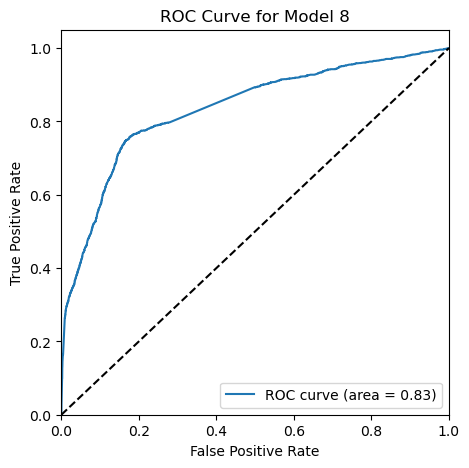

In [4835]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

#### *Optimal Cutoff Point*

In [4837]:
#Create a table for all cut off-points and then calculate the metrics

num = [float(x)/20 for x in range(0,20)]
for i in num:
    y_train_pred_final[i] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)

y_train_pred_final.head(10)

,User_num,Converted,Converted_prob,Prediction,0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95
0,8181,0,0.915672,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
1,3241,1,0.432853,0,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0
2,2124,1,0.643877,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0
3,5194,1,0.118029,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1166,1,0.204248,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,4666,0,0.153448,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,7812,1,0.313111,0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
7,7365,0,0.204248,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,5337,0,0.986424,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
9,5272,1,0.420652,0,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0


In [4838]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff = pd.DataFrame(columns = ['Probability', 'Accuracy', 'Sensitivity', 'Specificity', 'FPR', 'Precision'])

for i in num:
    confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i])
    accuracy = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final[i])
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives

    Sensitivity = TP/float(TP + FN)
    Specificity = TN / float(TN + FP)
    False_positive_Rate = 1-Specificity
    Precision = TP/float(TP+FP)

    cutoff.loc[i] = [i, accuracy, Sensitivity, Specificity, False_positive_Rate, Precision]

In [4839]:
# Find the cutoff where Accuracy, Sensitivity, and Specificity are closest
cutoff['Cutoff_Diff'] = abs(cutoff['Accuracy'] - cutoff['Sensitivity']) + abs(cutoff['Accuracy'] - cutoff['Specificity'])
best_cutoff = cutoff['Probability'][cutoff['Cutoff_Diff'].idxmin()]

In [4840]:
best_cutoff

0.25

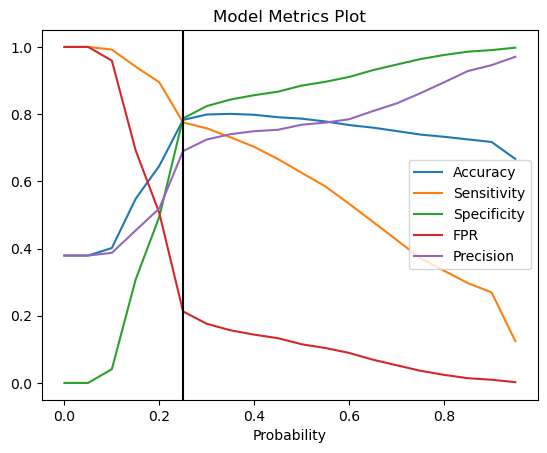

0.25


In [4841]:
# Let's plot all the metrics for various probabilities.
cutoff.plot.line(x='Probability', y=['Accuracy', 'Sensitivity', 'Specificity', 'FPR', 'Precision'])
plt.axvline(x=best_cutoff, color='black')
plt.title("Model Metrics Plot")
plt.show()

print(best_cutoff)

In [4842]:
# 0.25 is the best cut-off value for this model based on the above graph

#### *Precision and Recall Tradeoff*

In [4844]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

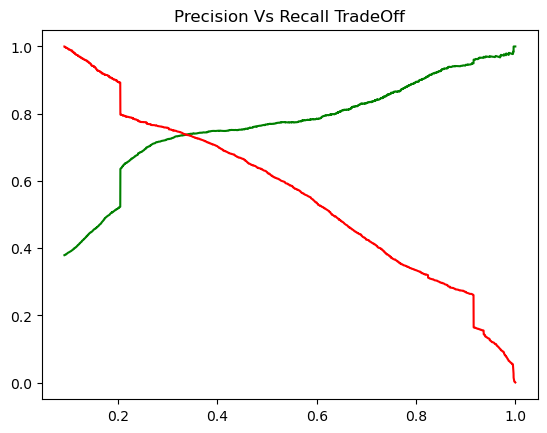

In [4845]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.title("Precision Vs Recall TradeOff")
plt.show()

In [4846]:
# We're trying to maximise recall in this case.
# This means we're trying to get as many potential conversions as possible.
# So, choosing a threshold between 0.25 and 0.3 as the ideal cut-off point.

---------

### <font color = Dark> *4. Making Predictions on the Test Set* 

In [4849]:
X_test[['TotalVisits', 'Website_time', 'Views_Per_Visit']] = scaler.fit_transform(X_test[['TotalVisits', 'Website_time', 'Views_Per_Visit']])

In [4850]:
X_test = X_test[col]
X_test.head()

,Website_time,Lead_Origin_API,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Import,Lead_Source_Olark Chat,"Specialization_Banking, Investment And Insurance",Specialization_Marketing,Specialization_Operations,Current_Occupation_Working Professional
233,-0.653189,0,1,0,0,0,0,0,0
6242,-0.899617,0,0,0,0,0,0,0,0
4852,-0.437793,1,0,0,0,0,0,0,0
5308,-0.640411,0,1,0,0,0,0,0,0
7888,1.279901,0,1,0,0,0,1,0,0


In [4851]:
X_test_sm = sm.add_constant(X_test)

In [4852]:
y_test_pred = leads_mod8.fit().predict(X_test_sm)

In [4853]:
# Converting y_pred to a data frame which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_test_df = pd.DataFrame(y_test)

# Putting CustID to index
y_test_df['User_num'] = y_test_df.index

# Removing index for both data frames to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [4854]:
y_pred_final.head()

,Converted,User_num,0
0,0,233,0.114631
1,1,6242,0.913314
2,1,4852,0.162386
3,0,5308,0.116103
4,1,7888,0.607150


In [4855]:
y_pred_final.rename(columns = {0:'Conversion_Probability'}, inplace = True)
y_pred_final = y_pred_final.set_index('User_num')

In [4856]:
y_pred_final['Prediction'] = y_pred_final.Conversion_Probability.apply(lambda x: 1 if x > 0.28 else 0)

In [4857]:
y_pred_final

,Converted,Conversion_Probability,Prediction
User_num,,,
233,0,0.114631,0
6242,1,0.913314,1
4852,1,0.162386,0
5308,0,0.116103,0
7888,1,0.607150,1
...,...,...,...
7713,0,0.183411,0
3895,1,0.416733,1
5199,0,0.418949,1


----------

In [4859]:
# Test Metrics
model_metrics(y_pred_final)

Confusion Matrix

 [[1355  320]
 [ 259  772]]


Accuracy Score: 0.79
Sensitivity: 0.75
Specificity: 0.81
FPR: 0.19
Precision: 0.71


#### *After setting a threshold of 0.28, the recall is 75% and precision is 71%. This is the best metrics for this model.*

------

### <font color = Dark> *Lead Score Formula*

*The formula for calculating the **Lead Score** (out of 100) is:*

$$
\text{Lead Score (out of 100)} = \frac{100}{1 + e^{-\left(\text{Intercept} + \sum_{i=1}^{n} \text{Coefficient}_i \cdot \text{Feature}_i\right)}}
$$


In [4863]:
model_params = leads_mod8.fit().params.items()
Model_Parameters = pd.DataFrame(model_params, columns = ['Parameters','Coefficients'])

In [4864]:
# Final predictor variables and their coefficients without the constant from highest positive impact to highest negative impact
Model_Parameters.sort_values('Coefficients', ascending = False)[1:]

,Parameters,Coefficients
9,Current_Occupation_Working Professional,2.903854
1,Website_time,1.128875
5,Lead_Source_Olark Chat,0.771808
6,"Specialization_Banking, Investment And Insurance",0.521116
8,Specialization_Operations,0.341743
7,Specialization_Marketing,0.297422
4,Lead_Origin_Lead Import,-3.536228
2,Lead_Origin_API,-4.516706
3,Lead_Origin_Landing Page Submission,-4.677257


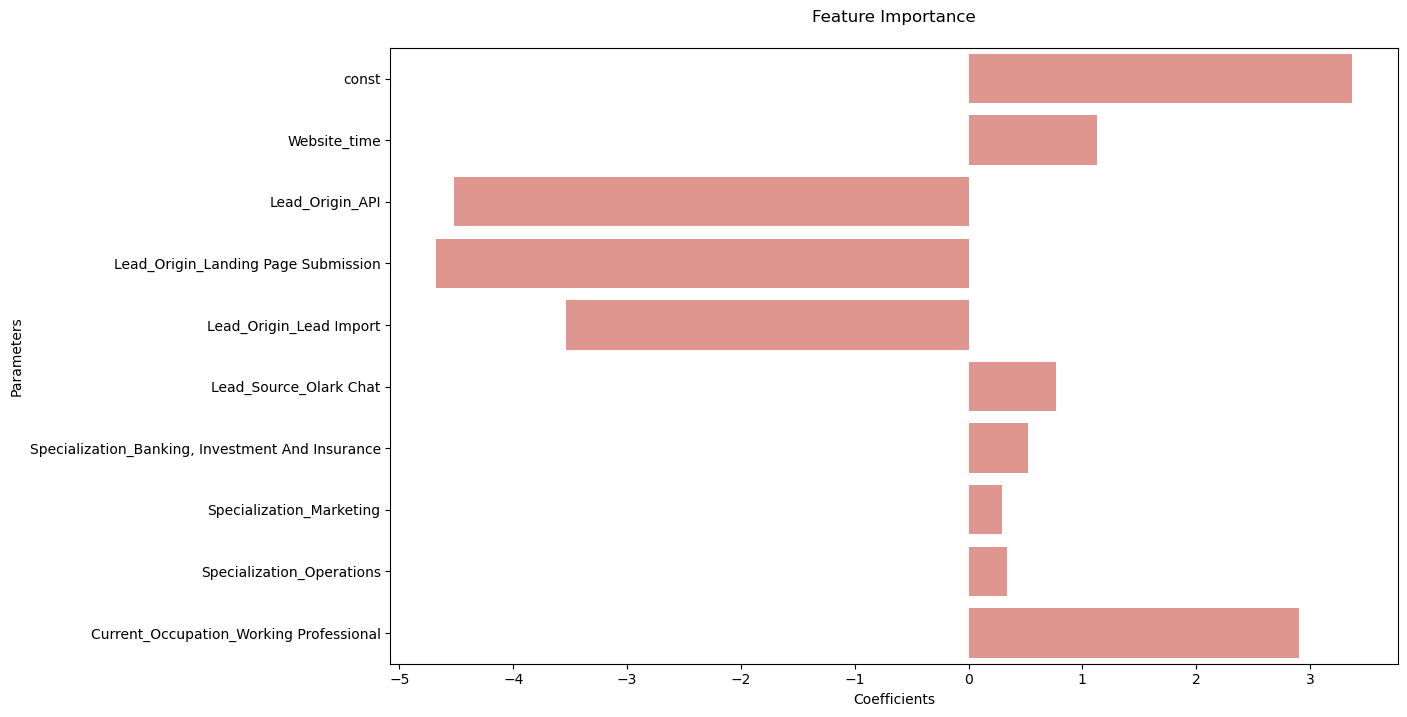

In [4865]:
# Feature Importance graph

plt.figure(figsize = (13,8))
sns.barplot(y = 'Parameters', x = 'Coefficients', data  = Model_Parameters, orient = "h", color = "#ec8b82")
plt.title("Feature Importance\n")
plt.show()

In [4866]:
#Python Code for a Lead Score
params = leads_mod8.fit().params
intercept = params['const']
coefficients = params.drop('const')

def lead_score(row):
    log = intercept
    for i,j in coefficients.items():
        log = log + row[i]*j
    prob = 1/(1+np.exp(-log))

    return round(prob*100)

In [4867]:
# Applying the score on our data set
# Scaling the leads dataset
leads_scored = leads.copy()
leads_scored[['TotalVisits', 'Website_time', 'Views_Per_Visit']] = scaler.fit_transform(leads_scored[['TotalVisits', 'Website_time', 'Views_Per_Visit']])

In [4868]:
leads_scored

,Converted,TotalVisits,Website_time,Views_Per_Visit,Free_E_Book_Chosen,Lead_Origin_API,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Source_Direct Traffic,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Reference,Lead_Source_Referral Sites,Lead_Source_Welingak Website,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_Finance,Specialization_Human Resource,Specialization_International Business,Specialization_Marketing,Specialization_Media and Advertising,Specialization_Operations,Specialization_Other Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Current_Occupation_Businessman,Current_Occupation_Housewife,Current_Occupation_Other,Current_Occupation_Student,Current_Occupation_Working Professional,City_Other Cities,City_Thane & Outskirts
0,0,-1.072591,-0.880846,-1.133360,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0.599682,0.356628,0.078909,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,-0.403682,1.931929,-0.163545,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,-0.738136,-0.320861,-0.648453,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,1,-0.403682,1.740983,-0.648453,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,1.603046,2.506601,0.161343,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9236,0,-0.403682,-0.443874,-0.163545,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
9237,0,-0.403682,-0.515479,-0.163545,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9238,1,-0.069227,0.035326,0.321363,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [4869]:
leads_scored['Lead_Score'] = leads_scored.apply(lead_score, axis = 1)

In [4870]:
leads_scored[['TotalVisits', 'Website_time', 'Views_Per_Visit', 'Converted', 'Lead_Score']].head(20)

,TotalVisits,Website_time,Views_Per_Visit,Converted,Lead_Score
0,-1.072591,-0.880846,-1.133360,0,20
1,0.599682,0.356628,0.078909,0,32
2,-0.403682,1.931929,-0.163545,1,71
3,-0.738136,-0.320861,-0.648453,0,16
4,-0.403682,1.740983,-0.648453,1,66
5,-1.072591,-0.880846,-1.133360,0,20
6,-0.403682,2.130218,-0.163545,1,75
7,-1.072591,-0.880846,-1.133360,0,20
8,-0.403682,-0.750488,-0.163545,0,10
9,0.265228,-0.774357,0.806270,0,12


-----------

In [4872]:
# Final Model parameters and Metrics

In [4873]:
Model_Parameters

,Parameters,Coefficients
0,const,3.370337
1,Website_time,1.128875
2,Lead_Origin_API,-4.516706
3,Lead_Origin_Landing Page Submission,-4.677257
4,Lead_Origin_Lead Import,-3.536228
5,Lead_Source_Olark Chat,0.771808
6,"Specialization_Banking, Investment And Insurance",0.521116
7,Specialization_Marketing,0.297422
8,Specialization_Operations,0.341743
9,Current_Occupation_Working Professional,2.903854


In [4874]:
model_metrics(y_pred_final)

Confusion Matrix

 [[1355  320]
 [ 259  772]]


Accuracy Score: 0.79
Sensitivity: 0.75
Specificity: 0.81
FPR: 0.19
Precision: 0.71


-------